<a href="https://colab.research.google.com/github/mirco-heidemann/NGFS/blob/main/NGFS_EnTryQuickMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUICK MAP
---

*Launch Version (1.0)*

---

For feedback, please participate in our user standing survey [here](https://www.surveymonkey.de/r/C68V37M).

---
This script provides a GUI to quickly access, visualise and export data of the NGFS Scenarios. This code works identically in any python IDE when downloaded. Nonetheless, the advantage of this browser-based interface (Google Colab) is that no installation is needed, which may be problematic within some institutional infrastructures.

---

This notebook is *view only*. To **run this Colab notebook**, either:

- [By default] **Run in playground mode:**  Otherwise try File > Open in playground mode (Changes will not be saved, however data and visualisations can be downloaded)
- **Make a copy to your Google Drive so you can make local changes:** File > Save a copy in Drive, or open a new notebook File > New Notebook to copy the code and create your own script (not possible if Google Drive is blocked by firewalls or security)
- **Download the script as Jupyter notebook, so you can run it on your computer configured with Jupyter:** File > Download .ipynb (not possible if Google Drive is blocked by firewalls or security)


---
---

*The code is based on an open-source Python package pyam-iamc. For guidance and documentation on the pyam-iamc package refer to information provided [here](https://pyam-iamc.readthedocs.io/en/stable/index.html).*

*For support on undocumented problems in Pyam please raise the issue in the [GitHub Forum](https://github.com/IAMconsortium/pyam/issues) or join the [Slack Community](https://pyam-iamc.slack.com/join/shared_invite/zt-1xapbpjw3-hfVe7dJ16U1DtxibB65H1Q#/shared-invite/email)* and raise the issue in the #helpdesk.

*For support on the use of Google Colab, please refer to the [FAQ](https://research.google.com/colaboratory/faq.html).*

*For questions and comments on the NGFS scripts and their application, please reach out to Clemens Lehofer (clemens-maria.lehofer@ecb.europa.eu) or Mario Morelli (mario.morelli@ecb.europa.eu).*

---
---

# Initialisation

To start your connection, click the run button below and run the initialisation code cells. (The loading can take up to one minute.)

In [ ]:
!pip install ixmp4
!pip install pyam-iamc
import pyam
import ixmp4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

In [ ]:
# @title
# IMPORT THE NGFS FONT STYLE

from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-It.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Bold.ttf

font_files = fm.findSystemFonts('.')

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='Myriad Pro')

#SET THE GENERAL NGFS COLOR PALETTE -  with 'cmap=ngfs_cmap' it can be used in any .plot function

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap(colors, name='custom_colormap'):
    n_bins = 20  # Number of bins in the colormap
    cmap = LinearSegmentedColormap.from_list(name, colors, N=n_bins)
    return cmap

ngfs_colors = ['#BFC80F','#6F7374', '#F37022', '#B00069', '#016BAB', '#009BA3']

ngfs_cmap = create_custom_colormap(ngfs_colors)


# ASSIGN SPECIFIC COLORS TO SPECIFIC PARAMETERS - these settings are superior to any general color palette i.e. cmap

color_map = {
'ngfs_phase_2':'#6F7374',
'ngfs_phase_3':'#BFC80F',
'ngfs_phase_4': '#009BA3',
'GCAM 6.0 NGFS': '#009BA3',
'GCAM': '#009BA3',
'REMIND': '#6F7374',
'REMIND-MAgPIE 3.2-4.6': '#6F7374',
'REMIND-MAgPIE 3.1-4.6': '#6F7374',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'MESSAGE': '#BFC80F',
'GCAM 5.3+ NGFS': '#81C9CD',
'REMIND-MAgPIE 3.0-4.4': '#B9B9B9',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'NiGEM NGFS v1.22 [GCAM 5.3+ NGFS]': '#81C9CD',
'NiGEM NGFS v1.22 [REMIND-MAgPIE 3.0-4.4]': '#B9B9B9',
'NiGEM NGFS v1.22 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#EDF466',
'NiGEM NGFS v1.23.1[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.1[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.1 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]': '#009BA3',
'NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]': '#6F7374',
'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]': '#BFC80F',
'NiGEM NGFS v1.23.2\\[MESSAGEix-GLOBIOM 1.1-M-R12\\]': '#BFC80F',
'Fragmented World': '#B00069',
'd_delfrag': '#009BA3',
'd_strain': '#B00069',
'h_cpol': '#6F7374',
'h_ndc': '#F37022',
'o_1p5c': '#BFC80F',
'o_2c': '#016BAB',
'Current Policies': '#6F7374',
'Delayed transition': '#009BA3',
'Divergent Net Zero': '#B00069',
'Nationally Determined Contributions (NDCs)': '#F37022',
'Nationally Determined Contributions (NDCs) ': '#F37022',
'Current Policies ': '#6F7374',
'NDCs': '#F37022',
'Net Zero 2050': '#BFC80F',
'Below 2?C': '#016BAB',
'Below 2°C': '#016BAB',
'o_lowdem':'#E88ECC',
'Low Demand':'#E88ECC',
'NiGEM NGFS v1.22|United States': '#009BA3',
'NiGEM NGFS v1.22|Developing Europe': '#6F7374',
'NiGEM NGFS v1.22|Asia': '#BFC80F',
'NiGEM NGFS v1.22|Latin America': '#B00069',
'NiGEM NGFS v1.22|Europe': '#F37022',
'Latin America (R5)': '#B00069',
'Asia (R5)': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'OECD & EU (R5)': '#F37022',
'Reforming Economies (R5)': '#6F7374',
'Latin America': '#B00069',
'Asia': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'Europe': '#F37022',
'Developing Europe': '#6F7374',
'World': '#016BAB',
'NiGEM NGFS v1.22|World': '#016BAB',
'Emissions|CO2|AFOLU': '#B00069',
'Emissions|CO2|Energy|Demand|Industry': '#F37022',
'Emissions|CO2|Energy|Demand|Residential and Commercial': '#BFC80F',
'Emissions|CO2|Energy|Demand|Transportation': '#016BAB',
'Emissions|CO2|Energy|Supply': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'NiGEM|Gross Domestic Product (GDP)|Chronic physical': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Combined': '#016BAB',
'NiGEM|Gross Domestic Product (GDP)|Transition': '#BFC80F',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'Gross Domestic Product (GDP)(chronic)': '#009BA3',
'Gross Domestic Product (GDP)(combined)': '#016BAB',
'Gross Domestic Product (GDP)(transition)': '#BFC80F',
'Average': '#F37022',
'Max': '#BFC80F',
'Min': '#009BA3'
}

import matplotlib as mpl #account for the missing minus sign in the font, Replace it with a hyphen
mpl.rcParams['axes.unicode_minus'] = False

pyam.run_control().update({'color': {'model': color_map}})
pyam.run_control().update({'color': {'scenario': color_map}})
pyam.run_control().update({'color': {'region': color_map}})
pyam.run_control().update({'color': {'variable': color_map}})

--2023-12-01 13:52:58--  https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf [following]
--2023-12-01 13:52:58--  https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31872 (31K) [application/octet-stream]
Saving to: ‘MyriadPro-Regular.ttf’

MyriadPro-Regular.t 100%[===================>]  31.12K  --.-KB/s    in 0.01s   

2023-12-01 13:52:58 (2.51 MB/s) - ‘MyriadPro-Regular.ttf’ saved [31872/31872]

--2023-1

# Quick Map

**The API access provided through the menus below will always query the latest available update of NGFS scenario data. An overview of data versions can be found under the Download tab in the IIASA scenario Explorer of the respective Phase.**

First, run the code by clicking the "play" button on the left-hand side below. Then make changes to the selection fields to query and visualise the data. Multiple selections are possible, allowing cross-phase, -model or -scenario comparison. After each query, there is the possibility to download the queried data as an Excel file.


## NiGEM

ATTENTION: The tool will throw error messages if the combination of parameters is not valid. Keep in mind some variables are not available for some scenarios by definition e.g. transition risks are not included in current policies.

**To check which variables or regions are available in which phase or model and navigate the data dimensions, refer to this [parameter guide](https://colab.research.google.com/drive/1me73vvS2rQCFeQ3q1Ohck3JMltG0hEGS?usp=sharing).**

In [ ]:
# @title
################################################################################
# CREATE DROPDOWN MULTIPLE SELECTION MENUS
################################################################################

import ipywidgets as widgets
from IPython.display import display

def create_dropdown(options, value, description, rows):
    dropdown = widgets.SelectMultiple(
        options=options,
        value=value,
        description=description,
        rows=rows
    )
    return dropdown

row_number = 6

# Dropdown widgets with multiple selection
NGFS_phase_dropdown = create_dropdown(["ngfs_phase_3", "ngfs_phase_4"], ["ngfs_phase_4"], "NGFS phase", rows=row_number)
Model_dropdown = create_dropdown(['GCAM', 'MESSAGE', 'REMIND'], ['REMIND'], "Model", rows=row_number)
Scenario_dropdown = create_dropdown([ 'Current Policies', 'Fragmented World', 'Nationally Determined Contributions (NDCs)', 'Divergent Net Zero', 'Delayed transition', 'Below 2°C','Net Zero 2050'], ['Net Zero 2050'], "Scenario", rows=row_number+4)

Year_dropdown = create_dropdown([2023, 2030, 2040, 2050], [2050], "Year", rows=row_number)
Variable_dropdown = create_dropdown(['Central bank Intervention rate (policy interest rate) ; %','Central bank Intervention rate (policy interest rate) ; %(chronic)','Central bank Intervention rate (policy interest rate) ; %(combined)','Central bank Intervention rate (policy interest rate) ; %(transition)','Coal price ; US$ per barrel (equiv)','Coal price ; US$ per barrel (equiv)(chronic)','Coal price ; US$ per barrel (equiv)(combined)','Coal price ; US$ per barrel (equiv)(transition)','Consumption (private)(chronic)','Consumption (private)(chronic)','Consumption (private)(combined)','Consumption (private)(transition)','Domestic demand','Domestic demand(chronic)','Domestic demand(combined)','Domestic demand(transition)','Effective exchange rate','Effective exchange rate(chronic)','Effective exchange rate(combined)','Effective exchange rate(transition)','Energy consumption (total) ; MnToe','Energy consumption (total) ; MnToe(chronic)','Energy consumption (total) ; MnToe(combined)','Energy consumption (total) ; MnToe(transition)','Equity prices','Equity prices(chronic)','Equity prices(combined)','Equity prices(transition)','Exports (goods and services)','Exports (goods and services)(chronic)','Exports (goods and services)(combined)','Exports (goods and services)(transition)','Gas price ; US$ per barrel (equiv)','Gas price ; US$ per barrel (equiv)(chronic)','Gas price ; US$ per barrel (equiv)(combined)','Gas price ; US$ per barrel (equiv)(transition)','Gov. consumption','Gov. consumption(chronic)','Gov. consumption(combined)','Gov. consumption(transition)','Gross Domestic Product (GDP)','Gross Domestic Product (GDP)(transition)','Gross Domestic Product (GDP)(chronic)','Gross Domestic Product (GDP)(combined)','Gross Domestic Product (GDP)(acute)','Gross Domestic Product (GDP)(cyclone-90)','Gross Domestic Product (GDP)(drought-90)','Gross Domestic Product (GDP)(flood)','Gross Domestic Product (GDP)(heatwave-90)','House prices (residential)','House prices (residential)(chronic)','House prices (residential)(combined)','House prices (residential)(transition)','Imports (goods and services)','Imports (goods and services)(chronic)','Imports (goods and services)(combined)','Imports (goods and services)(transition)','Inflation rate ; %','Inflation rate ; %(chronic)','Inflation rate ; %(combined)','Inflation rate ; %(transition)','Investment (gov.)','Investment (gov.)(chronic)','Investment (gov.)(combined)','Investment (gov.)(transition)','Investment (private sector)','Investment (private sector)(chronic)','Investment (private sector)(combined)','Investment (private sector)(transition)','Long term interest rate ; %','Long term interest rate ; %(chronic)','Long term interest rate ; %(combined)','Long term interest rate ; %(transition)','Long term real interest rate ; %','Long term real interest rate ; %(chronic)','Long term real interest rate ; %(combined)','Long term real interest rate ; %(transition)','Oil price ; US$ per barrel','Oil price ; US$ per barrel(chronic)','Oil price ; US$ per barrel(combined)','Oil price ; US$ per barrel(transition)','Real personal disposable income','Real personal disposable income(chronic)','Real personal disposable income(combined)','Real personal disposable income(transition)','Unemployment rate ; %','Unemployment rate ; %(chronic)','Unemployment rate ; %(combined)','Unemployment rate ; %(transition)'],['Gross Domestic Product (GDP)(transition)'], "Variable", rows=row_number+4)

################################################################################
# DEFINE WORK CONSOLE
################################################################################

def on_dropdown_change():
    print(" ")
    print("Loading... - plot generation in progress")
    print(" ")

    global ngfs_phase

    model = list(Model_dropdown.value)
    variable = list(Variable_dropdown.value)
    scenario = list(Scenario_dropdown.value)
    ngfs_phase = list(NGFS_phase_dropdown.value)
    year = Year_dropdown.value
    year = year[0]

################################################################################
# RENAMING FROM SIMPLE TO QUERYING
################################################################################

    # RENAME MODELS FOR QUERYING
    rename_dict_phase_3 = {
    "GCAM": "NiGEM NGFS v1.22 \[GCAM 5.3+ NGFS\]",
    'REMIND': "NiGEM NGFS v1.22 \[REMIND-MAgPIE 3.0-4.4\]",
    'MESSAGE': "NiGEM NGFS v1.22 \[MESSAGEix-GLOBIOM 1.1-M-R12\]"
    }
    rename_dict_phase_4 = {
    "GCAM": "NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]",
    'REMIND': "NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]",
    'MESSAGE': "NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]"
    }

    if ngfs_phase == ['ngfs_phase_3']:
      rename_dict = rename_dict_phase_3
    elif ngfs_phase == ['ngfs_phase_4']:
      rename_dict = rename_dict_phase_4
    else:
      raise ValueError("Invalid ngfs_phase value")


    model = [rename_dict.get(m, m) for m in model]

    if len(list(Model_dropdown.value)) > 1 and len(ngfs_phase) > 1:
      model = [model for model in model for model in model]
    elif len(ngfs_phase) > 1:
      model = model[0]
    elif len(list(Model_dropdown.value)) > 1:
      None
    else:
      None


#   RENAME SCENARIOS
    rename_scenariosp4 = {
        'Delayed transition':'d_delfrag',
        'Fragmented World':'d_strain',
        'Current Policies':'h_cpol',
        'Nationally Determined Contributions (NDCs)':'h_ndc',
        'Net Zero 2050': 'o_1p5c',
        'Below 2°C':'o_2c',
        'Below 2?C':'o_2c',
        'Low Demand': 'o_lowdem'
    }

    if 'ngfs_phase_4' in ngfs_phase:
        phase4scenarios = [rename_scenariosp4.get(scenario_part, scenario_part) for scenario_part in scenario]
        scenario = scenario + phase4scenarios
    else:
        None


    # RENAME VARIABLES
    renamevariables1={'Emissions|CO2':['Emissions|CO2','Emissions|CO2','Emissions|CO2'],'Emissions|CO2|AFOLU':['Emissions|CO2|AFOLU','Emissions|CO2|AFOLU','Emissions|CO2|AFOLU'],'Emissions|CO2|Energy and Industrial Processes':['Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy and Industrial Processes'],'Emissions|CO2|Industrial Processes':['Emissions|CO2|Industrial Processes','Emissions|CO2|Industrial Processes','Emissions|CO2|Industrial Processes'],'Emissions|CO2|Energy':['Emissions|CO2|Energy','Emissions|CO2|Energy','Emissions|CO2|Energy'],'Emissions|CO2|Energy|Demand':['Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand'],'Emissions|CO2|Energy|Demand|AFOFI':['Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|AFOFI'],'Emissions|CO2|Energy|Demand|Industry':['Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry'],'Emissions|CO2|Energy|Demand|Industry|Cement':['Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Cement'],'Emissions|CO2|Energy|Demand|Industry|Chemicals':['Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Chemicals'],'Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals':['Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals','Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals'],'Emissions|CO2|Energy|Demand|Industry|Other':['Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Other'],'Emissions|CO2|Energy|Demand|Industry|Steel':['Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Industry|Steel'],'Emissions|CO2|Energy|Demand|Residential and Commercial':['Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial'],'Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial':['Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial'],'Emissions|CO2|Energy|Demand|Residential and Commercial|Residential':['Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential'],'Emissions|CO2|Energy|Demand|Transportation':['Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation'],'Emissions|CO2|Energy|Demand|Transportation|Aviation':['Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation'],'Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger':['Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger'],'Emissions|CO2|Energy|Demand|Transportation|Freight':['Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Freight'],'Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight':['Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight','Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight'],'Emissions|CO2|Energy|Demand|Transportation|Passenger':['Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Passenger'],'Emissions|CO2|Energy|Demand|Transportation|Rail':['Emissions|CO2|Energy|Demand|Transportation|Rail','Emissions|CO2|Energy|Demand|Transportation|Rail'],'Emissions|CO2|Energy|Demand|Transportation|Rail|Freight':['Emissions|CO2|Energy|Demand|Transportation|Rail|Freight','Emissions|CO2|Energy|Demand|Transportation|Rail|Freight'],'Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger':['Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger','Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger'],'Emissions|CO2|Energy|Demand|Transportation|Road':['Emissions|CO2|Energy|Demand|Transportation|Road','Emissions|CO2|Energy|Demand|Transportation|Road'],'Emissions|CO2|Energy|Demand|Transportation|Road|Freight':['Emissions|CO2|Energy|Demand|Transportation|Road|Freight','Emissions|CO2|Energy|Demand|Transportation|Road|Freight'],'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger':['Emissions|CO2|Energy|Demand|Transportation|Road|Passenger','Emissions|CO2|Energy|Demand|Transportation|Road|Passenger'],'Emissions|CO2|Energy|Supply':['Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply'],'Emissions|CO2|Energy|Supply|Electricity':['Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Electricity'],'Emissions|CO2|Energy|Supply|Gases':['Emissions|CO2|Energy|Supply|Gases','Emissions|CO2|Energy|Supply|Gases'],'Emissions|CO2|Energy|Supply|Heat':['Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Heat'],'Emissions|CO2|Energy|Supply|Liquids':['Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Liquids'],'Emissions|CO2|Energy|Supply|Other Sector':['Emissions|CO2|Energy|Supply|Other Sector'],'Emissions|CO2|Energy|Supply|Solids':['Emissions|CO2|Energy|Supply|Solids','Emissions|CO2|Energy|Supply|Solids'],'Emissions|CO2|LULUCF Direct+Indirect':['Emissions|CO2|LULUCF Direct+Indirect'],'Emissions|CO2|LULUCF Indirect':['Emissions|CO2|LULUCF Indirect'],'Price|Carbon':['Price|Carbon','Price|Carbon','Price|Carbon'],'Primary Energy':['Primary Energy','Primary Energy','Primary Energy'],'Primary Energy|Biomass':['Primary Energy|Biomass','Primary Energy|Biomass','Primary Energy|Biomass'],'Primary Energy|Coal':['Primary Energy|Coal','Primary Energy|Coal','Primary Energy|Coal'],'Primary Energy|Fossil':['Primary Energy|Fossil','Primary Energy|Fossil','Primary Energy|Fossil'],'Primary Energy|Gas':['Primary Energy|Gas','Primary Energy|Gas','Primary Energy|Gas'],'Primary Energy|Geothermal':['Primary Energy|Geothermal','Primary Energy|Geothermal'],'Primary Energy|Hydro':['Primary Energy|Hydro','Primary Energy|Hydro'],'Primary Energy|Non-Biomass Renewables':['Primary Energy|Non-Biomass Renewables','Primary Energy|Non-Biomass Renewables','Primary Energy|Non-Biomass Renewables'],'Primary Energy|Nuclear':['Primary Energy|Nuclear','Primary Energy|Nuclear','Primary Energy|Nuclear'],'Primary Energy|Ocean':['Primary Energy|Ocean'],'Primary Energy|Oil':['Primary Energy|Oil','Primary Energy|Oil','Primary Energy|Oil'],'Primary Energy|Other':['Primary Energy|Other','Primary Energy|Other','Primary Energy|Other'],'Primary Energy|Solar':['Primary Energy|Solar','Primary Energy|Solar'],'Primary Energy|Wind':['Primary Energy|Wind','Primary Energy|Wind'],'Production|Cement':['Production|Cement','Production|Cement','Production|Cement'],'Production|Chemicals':['Production|Chemicals','Production|Chemicals'],'Production|Non-ferrous metals':['Production|Non-ferrous metals','Production|Non-ferrous metals','Production|Non-ferrous metals'],'Production|Steel':['Production|Steel','Production|Steel','Production|Steel'],'Temperature|Global Mean':['Temperature|Global Mean','Temperature|Global Mean'],'Carbon Sequestration|CCS':['Carbon Sequestration|CCS','Carbon Sequestration|CCS','Carbon Sequestration|CCS'],'Carbon Sequestration|Land Use':['Carbon Sequestration|Land Use','Carbon Sequestration|Land Use','Carbon Sequestration|Land Use'],'Population':['Population','Population','Population'],'Revenue|Government|Tax|Carbon':['Revenue|Government|Tax|Carbon','Revenue|Government|Tax|Carbon'],'Revenue|Government|Tax|Carbon|Demand|Industry':['Revenue|Government|Tax|Carbon|Demand|Industry','Revenue|Government|Tax|Carbon|Demand|Industry'],'Revenue|Government|Tax|Carbon|Demand|Residential and Commercial':['Revenue|Government|Tax|Carbon|Demand|Residential and Commercial','Revenue|Government|Tax|Carbon|Demand|Residential and Commercial'],'Revenue|Government|Tax|Carbon|Demand|Transportation':['Revenue|Government|Tax|Carbon|Demand|Transportation','Revenue|Government|Tax|Carbon|Demand|Transportation'],'Revenue|Government|Tax|Carbon|Supply':['Revenue|Government|Tax|Carbon|Supply','Revenue|Government|Tax|Carbon|Supply'],'Gross Domestic Product (GDP)':['Gross Domestic Product (GDP)','NiGEM|Gross Domestic Product (GDP)'],'Gross Domestic Product (GDP)(acute)':['Gross Domestic Product (GDP)(acute)','NiGEM|Gross Domestic Product (GDP)|Acute physical'],'Gross Domestic Product (GDP)(chronic)':['Gross Domestic Product (GDP)(chronic)','NiGEM|Gross Domestic Product (GDP)|Chronic physical'],'Gross Domestic Product (GDP)(combined)':['Gross Domestic Product (GDP)(combined)','NiGEM|Gross Domestic Product (GDP)|Combined','NIGEM|Gross Domestic Product (GDP)'],'Gross Domestic Product (GDP)(transition)':['Gross Domestic Product (GDP)(transition)','NiGEM|Gross Domestic Product (GDP)|Transition'],'Gross Domestic Product (GDP)(cyclone-90)':['Gross Domestic Product (GDP)(cyclone-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical'],'Gross Domestic Product (GDP)(drought-90)':['Gross Domestic Product (GDP)(drought-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical'],'Gross Domestic Product (GDP)(heatwave-90)':['Gross Domestic Product (GDP)(heatwave-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical'],'Gross Domestic Product (GDP)(flood)':['Gross Domestic Product (GDP)(flood)','NiGEM|Gross Domestic Product (GDP)|Acute physical'],'Central bank Intervention rate (policy interest rate) ; %':['Central bank Intervention rate (policy interest rate) ; %','NiGEM|Central bank Intervention rate (policy interest rate)'],'Central bank Intervention rate (policy interest rate) ; %(chronic)':['Central bank Intervention rate (policy interest rate) ; %(chronic)','NiGEM|Central bank Intervention rate (policy interest rate); %|Chronic physical'],'Central bank Intervention rate (policy interest rate) ; %(combined)':['Central bank Intervention rate (policy interest rate) ; %(combined)','NiGEM|Central bank Intervention rate (policy interest rate); %|Combined'],'Central bank Intervention rate (policy interest rate) ; %(transition)':['Central bank Intervention rate (policy interest rate) ; %(transition)','NiGEM|Central bank Intervention rate (policy interest rate); %|Transition'],'Consumption (private)(chronic)':['Consumption (private)(chronic)','NiGEM|Consumption (private)','NIGEM|Consumption (private)'],'Consumption (private)(chronic)':['Consumption (private)(chronic)','NiGEM|Consumption (private)|Chronic physical'],'Consumption (private)(combined)':['Consumption (private)(combined)','NiGEM|Consumption (private)|Combined','NIGEM|Consumption (private)'],'Consumption (private)(transition)':['Consumption (private)(transition)','NiGEM|Consumption (private)|Transition'],'Domestic demand':['Domestic demand','NiGEM|Domestic demand','NIGEM|Domestic demand'],'Domestic demand(chronic)':['Domestic demand(chronic)','NiGEM|Domestic demand|Chronic physical'],'Domestic demand(combined)':['Domestic demand(combined)','NiGEM|Domestic demand|Combined','NIGEM|Domestic demand'],'Domestic demand(transition)':['Domestic demand(transition)','NiGEM|Domestic demand|Transition'],'Effective exchange rate':['Effective exchange rate','NiGEM|Effective exchange rate','NIGEM|Effective exchange rate'],'Effective exchange rate(chronic)':['Effective exchange rate(chronic)','NiGEM|Effective exchange rate|Chronic physical'],'Effective exchange rate(combined)':['Effective exchange rate(combined)','NiGEM|Effective exchange rate|Combined','NIGEM|Effective exchange rate'],'Effective exchange rate(transition)':['Effective exchange rate(transition)','NiGEM|Effective exchange rate|Transition'],'Gov. consumption':['Gov. consumption','NiGEM|Gov. consumption','NIGEM|Gov. consumption'],'Gov. consumption(chronic)':['Gov. consumption(chronic)','NiGEM|Gov. consumption|Chronic physical'],'Gov. consumption(combined)':['Gov. consumption(combined)','NiGEM|Gov. consumption|Combined','NIGEM|Gov. consumption'],'Gov. consumption(transition)':['Gov. consumption(transition)','NiGEM|Gov. consumption|Transition'],'Inflation rate ; %':['Inflation rate ; %','NiGEM|Inflation rate','NIGEM|Inflation rate'],'Inflation rate ; %(chronic)':['Inflation rate ; %(chronic)','NiGEM|Inflation rate; %|Chronic physical'],'Inflation rate ; %(combined)':['Inflation rate ; %(combined)','NiGEM|Inflation rate; %|Combined','NIGEM|Inflation rate'],'Inflation rate ; %(transition)':['Inflation rate ; %(transition)','NiGEM|Inflation rate; %|Transition'],'Investment (gov.)':['Investment (gov.)','NiGEM|Investment (gov.)','NIGEM|Investment (gov.)'],'Investment (gov.)(chronic)':['Investment (gov.)(chronic)','NiGEM|Investment (gov.)|Chronic physical'],'Investment (gov.)(combined)':['Investment (gov.)(combined)','NiGEM|Investment (gov.)|Combined','NIGEM|Investment (gov.)'],'Investment (gov.)(transition)':['Investment (gov.)(transition)','NiGEM|Investment (gov.)|Transition'],'Investment (private sector)':['Investment (private sector)','NiGEM|Investment (private sector)','NIGEM|Investment (private sector)'],'Investment (private sector)(chronic)':['Investment (private sector)(chronic)','NiGEM|Investment (private sector)|Chronic physical'],'Investment (private sector)(combined)':['Investment (private sector)(combined)','NiGEM|Investment (private sector)|Combined','NIGEM|Investment (private sector)'],'Investment (private sector)(transition)':['Investment (private sector)(transition)','NiGEM|Investment (private sector)|Transition'],'Unemployment rate ; %':['Unemployment rate ; %','NiGEM|Unemployment rate','NiGEM|Unemployment rate'],'Unemployment rate ; %(chronic)':['Unemployment rate ; %(chronic)','NiGEM|Unemployment rate; %|Chronic physical'],'Unemployment rate ; %(combined)':['Unemployment rate ; %(combined)','NiGEM|Unemployment rate; %|Combined'],'Unemployment rate ; %(transition)':['Unemployment rate ; %(transition)','NiGEM|Unemployment rate; %|Transition'],'Real personal disposable income':['Real personal disposable income','NiGEM|Real personal disposable income','NIGEM|Real personal disposable income'],'Real personal disposable income(chronic)':['Real personal disposable income(chronic)','NiGEM|Real personal disposable income|Chronic physical'],'Real personal disposable income(combined)':['Real personal disposable income(combined)','NiGEM|Real personal disposable income|Combined'],'Real personal disposable income(transition)':['Real personal disposable income(transition)','NiGEM|Real personal disposable income|Transition'],'Energy consumption (total) ; MnToe':['Energy consumption (total) ; MnToe','NiGEM|Energy consumption (total)'],'Energy consumption (total) ; MnToe(chronic)':['Energy consumption (total) ; MnToe(chronic)','NiGEM|Energy consumption (total); MnToe|Chronic physical'],'Energy consumption (total) ; MnToe(combined)':['Energy consumption (total) ; MnToe(combined)','NiGEM|Energy consumption (total); MnToe|Combined'],'Energy consumption (total) ; MnToe(transition)':['Energy consumption (total) ; MnToe(transition)','NiGEM|Energy consumption (total); MnToe|Transition'],'Coal price ; US$ per barrel (equiv)':['Coal price ; US$ per barrel (equiv)','NiGEM|Coal price','NIGEM|Coal price'],'Coal price ; US$ per barrel (equiv)(chronic)':['Coal price ; US$ per barrel (equiv)(chronic)','NiGEM|Coal price|Chronic physical'],'Coal price ; US$ per barrel (equiv)(combined)':['Coal price ; US$ per barrel (equiv)(combined)','NiGEM|Coal price|Combined'],'Coal price ; US$ per barrel (equiv)(transition)':['Coal price ; US$ per barrel (equiv)(transition)','NiGEM|Coal price|Transition'],'Gas price ; US$ per barrel (equiv)':['Gas price ; US$ per barrel (equiv)','NiGEM|Gas price','NIGEM|Gas price'],'Gas price ; US$ per barrel (equiv)(chronic)':['Gas price ; US$ per barrel (equiv)(chronic)','NiGEM|Gas price|Chronic physical'],'Gas price ; US$ per barrel (equiv)(combined)':['Gas price ; US$ per barrel (equiv)(combined)','NiGEM|Gas price|Combined'],'Gas price ; US$ per barrel (equiv)(transition)':['Gas price ; US$ per barrel (equiv)(transition)','NiGEM|Gas price|Transition'],'Oil price ; US$ per barrel':['Oil price ; US$ per barrel','NiGEM|Oil price','NIGEM|Oil price'],'Oil price ; US$ per barrel(chronic)':['Oil price ; US$ per barrel(chronic)','NiGEM|Oil price|Chronic physical'],'Oil price ; US$ per barrel(combined)':['Oil price ; US$ per barrel(combined)','NiGEM|Oil price|Combined'],'Oil price ; US$ per barrel(transition)':['Oil price ; US$ per barrel(transition)','NiGEM|Oil price|Transition'],'Equity prices':['Equity prices','NiGEM|Equity prices','NIGEM|Equity prices'],'Equity prices(chronic)':['Equity prices(chronic)','NiGEM|Equity prices|Chronic physical'],'Equity prices(combined)':['Equity prices(combined)','NiGEM|Equity prices|Combined'],'Equity prices(transition)':['Equity prices(transition)','NiGEM|Equity prices|Transition'],'Long term interest rate ; %':['Long term interest rate ; %','NiGEM|Long term interest rate','NIGEM|Long term interest rate'],'Long term interest rate ; %(chronic)':['Long term interest rate ; %(chronic)','NiGEM|Long term interest rate; %|Chronic physical'],'Long term interest rate ; %(combined)':['Long term interest rate ; %(combined)','NiGEM|Long term interest rate; %|Combined'],'Long term interest rate ; %(transition)':['Long term interest rate ; %(transition)','NiGEM|Long term interest rate; %|Transition'],'Long term real interest rate ; %':['Long term real interest rate ; %','NiGEM|Long term real interest rate','NIGEM|Long term real interest rate'],'Long term real interest rate ; %(chronic)':['Long term real interest rate ; %(chronic)','NiGEM|Long term real interest rate; %|Chronic physical'],'Long term real interest rate ; %(combined)':['Long term real interest rate ; %(combined)','NiGEM|Long term real interest rate; %|Combined'],'Long term real interest rate ; %(transition)':['Long term real interest rate ; %(transition)','NiGEM|Long term real interest rate; %|Transition'],'Exports (goods and services)':['Exports (goods and services)','NiGEM|Exports (goods and services)','NIGEM|Exports (goods and services)'],'Exports (goods and services)(chronic)':['Exports (goods and services)(chronic)','NiGEM|Exports (goods and services)|Chronic physical'],'Exports (goods and services)(combined)':['Exports (goods and services)(combined)','NiGEM|Exports (goods and services)|Combined'],'Exports (goods and services)(transition)':['Exports (goods and services)(transition)','NiGEM|Exports (goods and services)|Transition'],'Imports (goods and services)':['Imports (goods and services)','NiGEM|Imports (goods and services)','NIGEM|Imports (goods and services)'],'Imports (goods and services)(chronic)':['Imports (goods and services)(chronic)','NiGEM|Imports (goods and services)|Chronic physical'],'Imports (goods and services)(combined)':['Imports (goods and services)(combined)','NiGEM|Imports (goods and services)|Combined'],'Imports (goods and services)(transition)':['Imports (goods and services)(transition)','NiGEM|Imports (goods and services)|Transition'],'House prices (residential)':['House prices (residential)','House prices (residential)'],'House prices (residential)(chronic)':['House prices (residential)(chronic)','NiGEM|House prices (residential)|Chronic physical'],'House prices (residential)(combined)':['House prices (residential)(combined)','NiGEM|House prices (residential)|Combined'],'House prices (residential)(transition)':['House prices (residential)(transition)','NiGEM|House prices (residential)|Transition']}

    variable = [renamevariables1.get(variable_part, variable_part) for variable_part in variable]
    variable = [item for sublist in variable for item in sublist]

################################################################################
# QUERYING
################################################################################

    global df
    global df_1
    global df_2
    global df_3
    global df_export
    global df_1_export
    global df_2_export
    global df_3_export


    #import warnings
    import pandas as pd

    region = [
    'NiGEM NGFS v1.23.2|Argentina',
    'NiGEM NGFS v1.23.2|Australia',
    'NiGEM NGFS v1.23.2|Austria',
    'NiGEM NGFS v1.23.2|Belgium',
    'NiGEM NGFS v1.23.2|Brazil',
    'NiGEM NGFS v1.23.2|Bulgaria',
    'NiGEM NGFS v1.23.2|Canada',
    'NiGEM NGFS v1.23.2|Chile',
    'NiGEM NGFS v1.23.2|China',
    'NiGEM NGFS v1.23.2|Czech Republic',
    'NiGEM NGFS v1.23.2|Denmark',
    'NiGEM NGFS v1.23.2|Egypt',
    'NiGEM NGFS v1.23.2|Estonia',
    'NiGEM NGFS v1.23.2|Finland',
    'NiGEM NGFS v1.23.2|France',
    'NiGEM NGFS v1.23.2|Germany',
    'NiGEM NGFS v1.23.2|Greece',
    'NiGEM NGFS v1.23.2|Hong Kong',
    'NiGEM NGFS v1.23.2|Hungary',
    'NiGEM NGFS v1.23.2|India',
    'NiGEM NGFS v1.23.2|Indonesia',
    'NiGEM NGFS v1.23.2|Ireland',
    'NiGEM NGFS v1.23.2|Italy',
    'NiGEM NGFS v1.23.2|Japan',
    'NiGEM NGFS v1.23.2|Latvia',
    'NiGEM NGFS v1.23.2|Lithuania',
    'NiGEM NGFS v1.23.2|Mexico',
    'NiGEM NGFS v1.23.2|Netherlands',
    'NiGEM NGFS v1.23.2|New Zealand',
    'NiGEM NGFS v1.23.2|Norway',
    'NiGEM NGFS v1.23.2|Poland',
    'NiGEM NGFS v1.23.2|Portugal',
    'NiGEM NGFS v1.23.2|Romania',
    'NiGEM NGFS v1.23.2|Russia',
    'NiGEM NGFS v1.23.2|Singapore',
    'NiGEM NGFS v1.23.2|Slovakia',
    'NiGEM NGFS v1.23.2|Slovenia',
    'NiGEM NGFS v1.23.2|South Africa',
    'NiGEM NGFS v1.23.2|South Korea',
    'NiGEM NGFS v1.23.2|Spain',
    'NiGEM NGFS v1.23.2|Sweden',
    'NiGEM NGFS v1.23.2|Switzerland',
    'NiGEM NGFS v1.23.2|Taiwan',
    'NiGEM NGFS v1.23.2|Turkey',
    'NiGEM NGFS v1.23.2|United Kingdom',
    'NiGEM NGFS v1.23.2|United States',
    'NiGEM NGFS v1.23.2|Viet Nam',
    'NiGEM NGFS v1.23.2|Croatia',
    'NiGEM NGFS v1.23.2|Malaysia',
    ]

    df = pyam.read_iiasa(
            name=ngfs_phase[0],
            model=model,
            variable=variable,
            region=region,
            scenario=scenario
        )

    if df.empty:
          raise Exception("The combination of parameters is not valid. Please choose a different combination and re-run your query and refer to the parameter guide to check feasible parameter combinations")

################################################################################
# RENAMING FROM QUERYING TO SIMPLE
################################################################################

    # RENAME FOR SIMPLIFICATION
    rename_scenarios2 = {
    'd_delfrag': 'Delayed transition',
    'd_strain': 'Fragmented World',
    'h_cpol': 'Current Policies',
    'h_ndc': 'NDCs',
    'o_1p5c': 'Net Zero 2050',
    'o_2c': 'Below 2°C',
    'Below 2?C': 'Below 2°C',
    'o_lowdem': 'Low Demand',
    'Nationally Determined Contributions (NDCs)': 'NDCs',
    'Nationally Determined Contributions (NDCs) ': 'NDCs',
    'Current Policies ':'Current Policies',
    }

    df = df.rename(scenario=rename_scenarios2)
    df_export = df

    scenario = [rename_scenarios2.get(scenario_part, scenario_part) for scenario_part in scenario]

    import numpy as np
    scenario = np.unique(scenario)


    renamevariables2={'Emissions|CO2':'Emissions|CO2','Emissions|CO2':'Emissions|CO2','Emissions|CO2':'Emissions|CO2','Emissions|CO2|AFOLU':'Emissions|CO2|AFOLU','Emissions|CO2|AFOLU':'Emissions|CO2|AFOLU','Emissions|CO2|AFOLU':'Emissions|CO2|AFOLU','Emissions|CO2|Energy and Industrial Processes':'Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy and Industrial Processes':'Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy and Industrial Processes':'Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Industrial Processes':'Emissions|CO2|Industrial Processes','Emissions|CO2|Industrial Processes':'Emissions|CO2|Industrial Processes','Emissions|CO2|Industrial Processes':'Emissions|CO2|Industrial Processes','Emissions|CO2|Energy':'Emissions|CO2|Energy','Emissions|CO2|Energy':'Emissions|CO2|Energy','Emissions|CO2|Energy':'Emissions|CO2|Energy','Emissions|CO2|Energy|Demand':'Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand':'Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand':'Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand|AFOFI':'Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|AFOFI':'Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|AFOFI':'Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|Industry':'Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry':'Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry':'Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry|Cement':'Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Cement':'Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Cement':'Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Chemicals':'Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Chemicals':'Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Chemicals':'Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals':'Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals','Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals':'Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals','Emissions|CO2|Energy|Demand|Industry|Other':'Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Other':'Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Other':'Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Steel':'Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Industry|Steel':'Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Industry|Steel':'Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Residential and Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial':'Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential':'Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential':'Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential':'Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Transportation':'Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation':'Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation':'Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation|Aviation':'Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation':'Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation':'Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Freight':'Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Freight':'Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Freight':'Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight':'Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight','Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight':'Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight','Emissions|CO2|Energy|Demand|Transportation|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Rail':'Emissions|CO2|Energy|Demand|Transportation|Rail','Emissions|CO2|Energy|Demand|Transportation|Rail':'Emissions|CO2|Energy|Demand|Transportation|Rail','Emissions|CO2|Energy|Demand|Transportation|Rail|Freight':'Emissions|CO2|Energy|Demand|Transportation|Rail|Freight','Emissions|CO2|Energy|Demand|Transportation|Rail|Freight':'Emissions|CO2|Energy|Demand|Transportation|Rail|Freight','Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger','Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger','Emissions|CO2|Energy|Demand|Transportation|Road':'Emissions|CO2|Energy|Demand|Transportation|Road','Emissions|CO2|Energy|Demand|Transportation|Road':'Emissions|CO2|Energy|Demand|Transportation|Road','Emissions|CO2|Energy|Demand|Transportation|Road|Freight':'Emissions|CO2|Energy|Demand|Transportation|Road|Freight','Emissions|CO2|Energy|Demand|Transportation|Road|Freight':'Emissions|CO2|Energy|Demand|Transportation|Road|Freight','Emissions|CO2|Energy|Demand|Transportation|Road|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger','Emissions|CO2|Energy|Demand|Transportation|Road|Passenger':'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger','Emissions|CO2|Energy|Supply':'Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply':'Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply':'Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply|Electricity':'Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Electricity':'Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Electricity':'Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Gases':'Emissions|CO2|Energy|Supply|Gases','Emissions|CO2|Energy|Supply|Gases':'Emissions|CO2|Energy|Supply|Gases','Emissions|CO2|Energy|Supply|Heat':'Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Heat':'Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Heat':'Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Liquids':'Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Liquids':'Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Liquids':'Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Other Sector':'Emissions|CO2|Energy|Supply|Other Sector','Emissions|CO2|Energy|Supply|Solids':'Emissions|CO2|Energy|Supply|Solids','Emissions|CO2|Energy|Supply|Solids':'Emissions|CO2|Energy|Supply|Solids','Emissions|CO2|LULUCF Direct+Indirect':'Emissions|CO2|LULUCF Direct+Indirect','Emissions|CO2|LULUCF Indirect':'Emissions|CO2|LULUCF Indirect','Price|Carbon':'Price|Carbon','Price|Carbon':'Price|Carbon','Price|Carbon':'Price|Carbon','Primary Energy':'Primary Energy','Primary Energy':'Primary Energy','Primary Energy':'Primary Energy','Primary Energy|Biomass':'Primary Energy|Biomass','Primary Energy|Biomass':'Primary Energy|Biomass','Primary Energy|Biomass':'Primary Energy|Biomass','Primary Energy|Coal':'Primary Energy|Coal','Primary Energy|Coal':'Primary Energy|Coal','Primary Energy|Coal':'Primary Energy|Coal','Primary Energy|Fossil':'Primary Energy|Fossil','Primary Energy|Fossil':'Primary Energy|Fossil','Primary Energy|Fossil':'Primary Energy|Fossil','Primary Energy|Gas':'Primary Energy|Gas','Primary Energy|Gas':'Primary Energy|Gas','Primary Energy|Gas':'Primary Energy|Gas','Primary Energy|Geothermal':'Primary Energy|Geothermal','Primary Energy|Geothermal':'Primary Energy|Geothermal','Primary Energy|Hydro':'Primary Energy|Hydro','Primary Energy|Hydro':'Primary Energy|Hydro','Primary Energy|Non-Biomass Renewables':'Primary Energy|Non-Biomass Renewables','Primary Energy|Non-Biomass Renewables':'Primary Energy|Non-Biomass Renewables','Primary Energy|Non-Biomass Renewables':'Primary Energy|Non-Biomass Renewables','Primary Energy|Nuclear':'Primary Energy|Nuclear','Primary Energy|Nuclear':'Primary Energy|Nuclear','Primary Energy|Nuclear':'Primary Energy|Nuclear','Primary Energy|Ocean':'Primary Energy|Ocean','Primary Energy|Oil':'Primary Energy|Oil','Primary Energy|Oil':'Primary Energy|Oil','Primary Energy|Oil':'Primary Energy|Oil','Primary Energy|Other':'Primary Energy|Other','Primary Energy|Other':'Primary Energy|Other','Primary Energy|Other':'Primary Energy|Other','Primary Energy|Solar':'Primary Energy|Solar','Primary Energy|Solar':'Primary Energy|Solar','Primary Energy|Wind':'Primary Energy|Wind','Primary Energy|Wind':'Primary Energy|Wind','Production|Cement':'Production|Cement','Production|Cement':'Production|Cement','Production|Cement':'Production|Cement','Production|Chemicals':'Production|Chemicals','Production|Chemicals':'Production|Chemicals','Production|Non-ferrous metals':'Production|Non-ferrous metals','Production|Non-ferrous metals':'Production|Non-ferrous metals','Production|Non-ferrous metals':'Production|Non-ferrous metals','Production|Steel':'Production|Steel','Production|Steel':'Production|Steel','Production|Steel':'Production|Steel','Temperature|Global Mean':'Temperature|Global Mean','Temperature|Global Mean':'Temperature|Global Mean','Carbon Sequestration|CCS':'Carbon Sequestration|CCS','Carbon Sequestration|CCS':'Carbon Sequestration|CCS','Carbon Sequestration|CCS':'Carbon Sequestration|CCS','Carbon Sequestration|Land Use':'Carbon Sequestration|Land Use','Carbon Sequestration|Land Use':'Carbon Sequestration|Land Use','Carbon Sequestration|Land Use':'Carbon Sequestration|Land Use','Population':'Population','Population':'Population','Population':'Population','Revenue|Government|Tax|Carbon':'Revenue|Government|Tax|Carbon','Revenue|Government|Tax|Carbon':'Revenue|Government|Tax|Carbon','Revenue|Government|Tax|Carbon|Demand|Industry':'Revenue|Government|Tax|Carbon|Demand|Industry','Revenue|Government|Tax|Carbon|Demand|Industry':'Revenue|Government|Tax|Carbon|Demand|Industry','Revenue|Government|Tax|Carbon|Demand|Residential and Commercial':'Revenue|Government|Tax|Carbon|Demand|Residential and Commercial','Revenue|Government|Tax|Carbon|Demand|Residential and Commercial':'Revenue|Government|Tax|Carbon|Demand|Residential and Commercial','Revenue|Government|Tax|Carbon|Demand|Transportation':'Revenue|Government|Tax|Carbon|Demand|Transportation','Revenue|Government|Tax|Carbon|Demand|Transportation':'Revenue|Government|Tax|Carbon|Demand|Transportation','Revenue|Government|Tax|Carbon|Supply':'Revenue|Government|Tax|Carbon|Supply','Revenue|Government|Tax|Carbon|Supply':'Revenue|Government|Tax|Carbon|Supply','Gross Domestic Product (GDP)':'Gross Domestic Product (GDP)','NiGEM|Gross Domestic Product (GDP)':'Gross Domestic Product (GDP)','Gross Domestic Product (GDP)(acute)':'Gross Domestic Product (GDP)(acute)','NiGEM|Gross Domestic Product (GDP)|Acute physical':'Gross Domestic Product (GDP)(acute)','Gross Domestic Product (GDP)(chronic)':'Gross Domestic Product (GDP)(chronic)','NiGEM|Gross Domestic Product (GDP)|Chronic physical':'Gross Domestic Product (GDP)(chronic)','Gross Domestic Product (GDP)(combined)':'Gross Domestic Product (GDP)(combined)','NiGEM|Gross Domestic Product (GDP)|Combined':'Gross Domestic Product (GDP)(combined)','NIGEM|Gross Domestic Product (GDP)':'Gross Domestic Product (GDP)(combined)','Gross Domestic Product (GDP)(transition)':'Gross Domestic Product (GDP)(transition)','NiGEM|Gross Domestic Product (GDP)|Transition':'Gross Domestic Product (GDP)(transition)','Gross Domestic Product (GDP)(cyclone-90)':'Gross Domestic Product (GDP)(cyclone-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical':'Gross Domestic Product (GDP)(cyclone-90)','Gross Domestic Product (GDP)(drought-90)':'Gross Domestic Product (GDP)(drought-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical':'Gross Domestic Product (GDP)(drought-90)','Gross Domestic Product (GDP)(heatwave-90)':'Gross Domestic Product (GDP)(heatwave-90)','NiGEM|Gross Domestic Product (GDP)|Acute physical':'Gross Domestic Product (GDP)(heatwave-90)','Gross Domestic Product (GDP)(flood)':'Gross Domestic Product (GDP)(flood)','NiGEM|Gross Domestic Product (GDP)|Acute physical':'Gross Domestic Product (GDP)(flood)','Central bank Intervention rate (policy interest rate) ; %':'Central bank Intervention rate (policy interest rate) ; %','NiGEM|Central bank Intervention rate (policy interest rate)':'Central bank Intervention rate (policy interest rate) ; %','Central bank Intervention rate (policy interest rate) ; %(chronic)':'Central bank Intervention rate (policy interest rate) ; %(chronic)','NiGEM|Central bank Intervention rate (policy interest rate); %|Chronic physical':'Central bank Intervention rate (policy interest rate) ; %(chronic)','Central bank Intervention rate (policy interest rate) ; %(combined)':'Central bank Intervention rate (policy interest rate) ; %(combined)','NiGEM|Central bank Intervention rate (policy interest rate); %|Combined':'Central bank Intervention rate (policy interest rate) ; %(combined)','Central bank Intervention rate (policy interest rate) ; %(transition)':'Central bank Intervention rate (policy interest rate) ; %(transition)','NiGEM|Central bank Intervention rate (policy interest rate); %|Transition':'Central bank Intervention rate (policy interest rate) ; %(transition)','Consumption (private)(chronic)':'Consumption (private)(chronic)','NiGEM|Consumption (private)':'Consumption (private)(chronic)','NIGEM|Consumption (private)':'Consumption (private)(chronic)','Consumption (private)(chronic)':'Consumption (private)(chronic)','NiGEM|Consumption (private)|Chronic physical':'Consumption (private)(chronic)','Consumption (private)(combined)':'Consumption (private)(combined)','NiGEM|Consumption (private)|Combined':'Consumption (private)(combined)','NIGEM|Consumption (private)':'Consumption (private)(combined)','Consumption (private)(transition)':'Consumption (private)(transition)','NiGEM|Consumption (private)|Transition':'Consumption (private)(transition)','Domestic demand':'Domestic demand','NiGEM|Domestic demand':'Domestic demand','NIGEM|Domestic demand':'Domestic demand','Domestic demand(chronic)':'Domestic demand(chronic)','NiGEM|Domestic demand|Chronic physical':'Domestic demand(chronic)','Domestic demand(combined)':'Domestic demand(combined)','NiGEM|Domestic demand|Combined':'Domestic demand(combined)','NIGEM|Domestic demand':'Domestic demand(combined)','Domestic demand(transition)':'Domestic demand(transition)','NiGEM|Domestic demand|Transition':'Domestic demand(transition)','Effective exchange rate':'Effective exchange rate','NiGEM|Effective exchange rate':'Effective exchange rate','NIGEM|Effective exchange rate':'Effective exchange rate','Effective exchange rate(chronic)':'Effective exchange rate(chronic)','NiGEM|Effective exchange rate|Chronic physical':'Effective exchange rate(chronic)','Effective exchange rate(combined)':'Effective exchange rate(combined)','NiGEM|Effective exchange rate|Combined':'Effective exchange rate(combined)','NIGEM|Effective exchange rate':'Effective exchange rate(combined)','Effective exchange rate(transition)':'Effective exchange rate(transition)','NiGEM|Effective exchange rate|Transition':'Effective exchange rate(transition)','Gov. consumption':'Gov. consumption','NiGEM|Gov. consumption':'Gov. consumption','NIGEM|Gov. consumption':'Gov. consumption','Gov. consumption(chronic)':'Gov. consumption(chronic)','NiGEM|Gov. consumption|Chronic physical':'Gov. consumption(chronic)','Gov. consumption(combined)':'Gov. consumption(combined)','NiGEM|Gov. consumption|Combined':'Gov. consumption(combined)','NIGEM|Gov. consumption':'Gov. consumption(combined)','Gov. consumption(transition)':'Gov. consumption(transition)','NiGEM|Gov. consumption|Transition':'Gov. consumption(transition)','Inflation rate ; %':'Inflation rate ; %','NiGEM|Inflation rate':'Inflation rate ; %','NIGEM|Inflation rate':'Inflation rate ; %','Inflation rate ; %(chronic)':'Inflation rate ; %(chronic)','NiGEM|Inflation rate; %|Chronic physical':'Inflation rate ; %(chronic)','Inflation rate ; %(combined)':'Inflation rate ; %(combined)','NiGEM|Inflation rate; %|Combined':'Inflation rate ; %(combined)','NIGEM|Inflation rate':'Inflation rate ; %(combined)','Inflation rate ; %(transition)':'Inflation rate ; %(transition)','NiGEM|Inflation rate; %|Transition':'Inflation rate ; %(transition)','Investment (gov.)':'Investment (gov.)','NiGEM|Investment (gov.)':'Investment (gov.)','NIGEM|Investment (gov.)':'Investment (gov.)','Investment (gov.)(chronic)':'Investment (gov.)(chronic)','NiGEM|Investment (gov.)|Chronic physical':'Investment (gov.)(chronic)','Investment (gov.)(combined)':'Investment (gov.)(combined)','NiGEM|Investment (gov.)|Combined':'Investment (gov.)(combined)','NIGEM|Investment (gov.)':'Investment (gov.)(combined)','Investment (gov.)(transition)':'Investment (gov.)(transition)','NiGEM|Investment (gov.)|Transition':'Investment (gov.)(transition)','Investment (private sector)':'Investment (private sector)','NiGEM|Investment (private sector)':'Investment (private sector)','NIGEM|Investment (private sector)':'Investment (private sector)','Investment (private sector)(chronic)':'Investment (private sector)(chronic)','NiGEM|Investment (private sector)|Chronic physical':'Investment (private sector)(chronic)','Investment (private sector)(combined)':'Investment (private sector)(combined)','NiGEM|Investment (private sector)|Combined':'Investment (private sector)(combined)','NIGEM|Investment (private sector)':'Investment (private sector)(combined)','Investment (private sector)(transition)':'Investment (private sector)(transition)','NiGEM|Investment (private sector)|Transition':'Investment (private sector)(transition)','Unemployment rate ; %':'Unemployment rate ; %','NiGEM|Unemployment rate':'Unemployment rate ; %','NiGEM|Unemployment rate':'Unemployment rate ; %','Unemployment rate ; %(chronic)':'Unemployment rate ; %(chronic)','NiGEM|Unemployment rate; %|Chronic physical':'Unemployment rate ; %(chronic)','Unemployment rate ; %(combined)':'Unemployment rate ; %(combined)','NiGEM|Unemployment rate; %|Combined':'Unemployment rate ; %(combined)','Unemployment rate ; %(transition)':'Unemployment rate ; %(transition)','NiGEM|Unemployment rate; %|Transition':'Unemployment rate ; %(transition)','Real personal disposable income':'Real personal disposable income','NiGEM|Real personal disposable income':'Real personal disposable income','NIGEM|Real personal disposable income':'Real personal disposable income','Real personal disposable income(chronic)':'Real personal disposable income(chronic)','NiGEM|Real personal disposable income|Chronic physical':'Real personal disposable income(chronic)','Real personal disposable income(combined)':'Real personal disposable income(combined)','NiGEM|Real personal disposable income|Combined':'Real personal disposable income(combined)','Real personal disposable income(transition)':'Real personal disposable income(transition)','NiGEM|Real personal disposable income|Transition':'Real personal disposable income(transition)','Energy consumption (total) ; MnToe':'Energy consumption (total) ; MnToe','NiGEM|Energy consumption (total)':'Energy consumption (total) ; MnToe','Energy consumption (total) ; MnToe(chronic)':'Energy consumption (total) ; MnToe(chronic)','NiGEM|Energy consumption (total); MnToe|Chronic physical':'Energy consumption (total) ; MnToe(chronic)','Energy consumption (total) ; MnToe(combined)':'Energy consumption (total) ; MnToe(combined)','NiGEM|Energy consumption (total); MnToe|Combined':'Energy consumption (total) ; MnToe(combined)','Energy consumption (total) ; MnToe(transition)':'Energy consumption (total) ; MnToe(transition)','NiGEM|Energy consumption (total); MnToe|Transition':'Energy consumption (total) ; MnToe(transition)','Coal price ; US$ per barrel (equiv)':'Coal price ; US$ per barrel (equiv)','NiGEM|Coal price':'Coal price ; US$ per barrel (equiv)','NIGEM|Coal price':'Coal price ; US$ per barrel (equiv)','Coal price ; US$ per barrel (equiv)(chronic)':'Coal price ; US$ per barrel (equiv)(chronic)','NiGEM|Coal price|Chronic physical':'Coal price ; US$ per barrel (equiv)(chronic)','Coal price ; US$ per barrel (equiv)(combined)':'Coal price ; US$ per barrel (equiv)(combined)','NiGEM|Coal price|Combined':'Coal price ; US$ per barrel (equiv)(combined)','Coal price ; US$ per barrel (equiv)(transition)':'Coal price ; US$ per barrel (equiv)(transition)','NiGEM|Coal price|Transition':'Coal price ; US$ per barrel (equiv)(transition)','Gas price ; US$ per barrel (equiv)':'Gas price ; US$ per barrel (equiv)','NiGEM|Gas price':'Gas price ; US$ per barrel (equiv)','NIGEM|Gas price':'Gas price ; US$ per barrel (equiv)','Gas price ; US$ per barrel (equiv)(chronic)':'Gas price ; US$ per barrel (equiv)(chronic)','NiGEM|Gas price|Chronic physical':'Gas price ; US$ per barrel (equiv)(chronic)','Gas price ; US$ per barrel (equiv)(combined)':'Gas price ; US$ per barrel (equiv)(combined)','NiGEM|Gas price|Combined':'Gas price ; US$ per barrel (equiv)(combined)','Gas price ; US$ per barrel (equiv)(transition)':'Gas price ; US$ per barrel (equiv)(transition)','NiGEM|Gas price|Transition':'Gas price ; US$ per barrel (equiv)(transition)','Oil price ; US$ per barrel':'Oil price ; US$ per barrel','NiGEM|Oil price':'Oil price ; US$ per barrel','NIGEM|Oil price':'Oil price ; US$ per barrel','Oil price ; US$ per barrel(chronic)':'Oil price ; US$ per barrel(chronic)','NiGEM|Oil price|Chronic physical':'Oil price ; US$ per barrel(chronic)','Oil price ; US$ per barrel(combined)':'Oil price ; US$ per barrel(combined)','NiGEM|Oil price|Combined':'Oil price ; US$ per barrel(combined)','Oil price ; US$ per barrel(transition)':'Oil price ; US$ per barrel(transition)','NiGEM|Oil price|Transition':'Oil price ; US$ per barrel(transition)','Equity prices':'Equity prices','NiGEM|Equity prices':'Equity prices','NIGEM|Equity prices':'Equity prices','Equity prices(chronic)':'Equity prices(chronic)','NiGEM|Equity prices|Chronic physical':'Equity prices(chronic)','Equity prices(combined)':'Equity prices(combined)','NiGEM|Equity prices|Combined':'Equity prices(combined)','Equity prices(transition)':'Equity prices(transition)','NiGEM|Equity prices|Transition':'Equity prices(transition)','Long term interest rate ; %':'Long term interest rate ; %','NiGEM|Long term interest rate':'Long term interest rate ; %','NIGEM|Long term interest rate':'Long term interest rate ; %','Long term interest rate ; %(chronic)':'Long term interest rate ; %(chronic)','NiGEM|Long term interest rate; %|Chronic physical':'Long term interest rate ; %(chronic)','Long term interest rate ; %(combined)':'Long term interest rate ; %(combined)','NiGEM|Long term interest rate; %|Combined':'Long term interest rate ; %(combined)','Long term interest rate ; %(transition)':'Long term interest rate ; %(transition)','NiGEM|Long term interest rate; %|Transition':'Long term interest rate ; %(transition)','Long term real interest rate ; %':'Long term real interest rate ; %','NiGEM|Long term real interest rate':'Long term real interest rate ; %','NIGEM|Long term real interest rate':'Long term real interest rate ; %','Long term real interest rate ; %(chronic)':'Long term real interest rate ; %(chronic)','NiGEM|Long term real interest rate; %|Chronic physical':'Long term real interest rate ; %(chronic)','Long term real interest rate ; %(combined)':'Long term real interest rate ; %(combined)','NiGEM|Long term real interest rate; %|Combined':'Long term real interest rate ; %(combined)','Long term real interest rate ; %(transition)':'Long term real interest rate ; %(transition)','NiGEM|Long term real interest rate; %|Transition':'Long term real interest rate ; %(transition)','Exports (goods and services)':'Exports (goods and services)','NiGEM|Exports (goods and services)':'Exports (goods and services)','NIGEM|Exports (goods and services)':'Exports (goods and services)','Exports (goods and services)(chronic)':'Exports (goods and services)(chronic)','NiGEM|Exports (goods and services)|Chronic physical':'Exports (goods and services)(chronic)','Exports (goods and services)(combined)':'Exports (goods and services)(combined)','NiGEM|Exports (goods and services)|Combined':'Exports (goods and services)(combined)','Exports (goods and services)(transition)':'Exports (goods and services)(transition)','NiGEM|Exports (goods and services)|Transition':'Exports (goods and services)(transition)','Imports (goods and services)':'Imports (goods and services)','NiGEM|Imports (goods and services)':'Imports (goods and services)','NIGEM|Imports (goods and services)':'Imports (goods and services)','Imports (goods and services)(chronic)':'Imports (goods and services)(chronic)','NiGEM|Imports (goods and services)|Chronic physical':'Imports (goods and services)(chronic)','Imports (goods and services)(combined)':'Imports (goods and services)(combined)','NiGEM|Imports (goods and services)|Combined':'Imports (goods and services)(combined)','Imports (goods and services)(transition)':'Imports (goods and services)(transition)','NiGEM|Imports (goods and services)|Transition':'Imports (goods and services)(transition)','House prices (residential)':'House prices (residential)','House prices (residential)':'House prices (residential)','House prices (residential)(chronic)':'House prices (residential)(chronic)','NiGEM|House prices (residential)|Chronic physical':'House prices (residential)(chronic)','House prices (residential)(combined)':'House prices (residential)(combined)','NiGEM|House prices (residential)|Combined':'House prices (residential)(combined)','House prices (residential)(transition)':'House prices (residential)(transition)','NiGEM|House prices (residential)|Transition':'House prices (residential)(transition)'}

    df = df.rename(variable=renamevariables2)
    df_export = df

    variable = [renamevariables2.get(variable_part, variable_part) for variable_part in variable]
    variable = np.unique(variable)


################################################################################
# PLOTTING
################################################################################

    import matplotlib.pyplot as plt

    regions_to_iso = {
    'NiGEM NGFS v1.22|Argentina': 'ARG',
    'NiGEM NGFS v1.22|Australia': 'AUS',
    'NiGEM NGFS v1.22|Austria': 'AUT',
    'NiGEM NGFS v1.22|Belgium': 'BEL',
    'NiGEM NGFS v1.22|Brazil': 'BRA',
    'NiGEM NGFS v1.22|Bulgaria': 'BGR',
    'NiGEM NGFS v1.22|Canada': 'CAN',
    'NiGEM NGFS v1.22|Chile': 'CHL',
    'NiGEM NGFS v1.22|China': 'CHN',
    'NiGEM NGFS v1.22|Czech Republic': 'CZE',
    'NiGEM NGFS v1.22|Denmark': 'DNK',
    'NiGEM NGFS v1.22|Egypt': 'EGY',
    'NiGEM NGFS v1.22|Estonia': 'EST',
    'NiGEM NGFS v1.22|Finland': 'FIN',
    'NiGEM NGFS v1.22|France': 'FRA',
    'NiGEM NGFS v1.22|Germany': 'DEU',
    'NiGEM NGFS v1.22|Greece': 'GRC',
    'NiGEM NGFS v1.22|Hong Kong': 'HKG',
    'NiGEM NGFS v1.22|Hungary': 'HUN',
    'NiGEM NGFS v1.22|India': 'IND',
    'NiGEM NGFS v1.22|Indonesia': 'IDN',
    'NiGEM NGFS v1.22|Ireland': 'IRL',
    'NiGEM NGFS v1.22|Italy': 'ITA',
    'NiGEM NGFS v1.22|Japan': 'JPN',
    'NiGEM NGFS v1.22|Latvia': 'LVA',
    'NiGEM NGFS v1.22|Lithuania': 'LTU',
    'NiGEM NGFS v1.22|Mexico': 'MEX',
    'NiGEM NGFS v1.22|Netherlands': 'NLD',
    'NiGEM NGFS v1.22|New Zealand': 'NZL',
    'NiGEM NGFS v1.22|Norway': 'NOR',
    'NiGEM NGFS v1.22|Poland': 'POL',
    'NiGEM NGFS v1.22|Portugal': 'PRT',
    'NiGEM NGFS v1.22|Romania': 'ROU',
    'NiGEM NGFS v1.22|Russia': 'RUS',
    'NiGEM NGFS v1.22|Singapore': 'SGP',
    'NiGEM NGFS v1.22|Slovakia': 'SVK',
    'NiGEM NGFS v1.22|Slovenia': 'SVN',
    'NiGEM NGFS v1.22|South Africa': 'ZAF',
    'NiGEM NGFS v1.22|South Korea': 'KOR',
    'NiGEM NGFS v1.22|Spain': 'ESP',
    'NiGEM NGFS v1.22|Sweden': 'SWE',
    'NiGEM NGFS v1.22|Switzerland': 'CHE',
    'NiGEM NGFS v1.22|Taiwan': 'TWN',
    'NiGEM NGFS v1.22|Turkey': 'TUR',
    'NiGEM NGFS v1.22|United Kingdom': 'GBR',
    'NiGEM NGFS v1.22|United States': 'USA',
    'NiGEM NGFS v1.22|Viet Nam': 'VNM',
    'NiGEM NGFS v1.23.2|Argentina': 'ARG',
    'NiGEM NGFS v1.23.2|Australia': 'AUS',
    'NiGEM NGFS v1.23.2|Austria': 'AUT',
    'NiGEM NGFS v1.23.2|Belgium': 'BEL',
    'NiGEM NGFS v1.23.2|Brazil': 'BRA',
    'NiGEM NGFS v1.23.2|Bulgaria': 'BGR',
    'NiGEM NGFS v1.23.2|Canada': 'CAN',
    'NiGEM NGFS v1.23.2|Chile': 'CHL',
    'NiGEM NGFS v1.23.2|China': 'CHN',
    'NiGEM NGFS v1.23.2|Czech Republic': 'CZE',
    'NiGEM NGFS v1.23.2|Denmark': 'DNK',
    'NiGEM NGFS v1.23.2|Egypt': 'EGY',
    'NiGEM NGFS v1.23.2|Estonia': 'EST',
    'NiGEM NGFS v1.23.2|Finland': 'FIN',
    'NiGEM NGFS v1.23.2|France': 'FRA',
    'NiGEM NGFS v1.23.2|Germany': 'DEU',
    'NiGEM NGFS v1.23.2|Greece': 'GRC',
    'NiGEM NGFS v1.23.2|Hong Kong': 'HKG',
    'NiGEM NGFS v1.23.2|Hungary': 'HUN',
    'NiGEM NGFS v1.23.2|India': 'IND',
    'NiGEM NGFS v1.23.2|Indonesia': 'IDN',
    'NiGEM NGFS v1.23.2|Ireland': 'IRL',
    'NiGEM NGFS v1.23.2|Italy': 'ITA',
    'NiGEM NGFS v1.23.2|Japan': 'JPN',
    'NiGEM NGFS v1.23.2|Latvia': 'LVA',
    'NiGEM NGFS v1.23.2|Lithuania': 'LTU',
    'NiGEM NGFS v1.23.2|Mexico': 'MEX',
    'NiGEM NGFS v1.23.2|Netherlands': 'NLD',
    'NiGEM NGFS v1.23.2|New Zealand': 'NZL',
    'NiGEM NGFS v1.23.2|Norway': 'NOR',
    'NiGEM NGFS v1.23.2|Poland': 'POL',
    'NiGEM NGFS v1.23.2|Portugal': 'PRT',
    'NiGEM NGFS v1.23.2|Romania': 'ROU',
    'NiGEM NGFS v1.23.2|Russia': 'RUS',
    'NiGEM NGFS v1.23.2|Singapore': 'SGP',
    'NiGEM NGFS v1.23.2|Slovakia': 'SVK',
    'NiGEM NGFS v1.23.2|Slovenia': 'SVN',
    'NiGEM NGFS v1.23.2|South Africa': 'ZAF',
    'NiGEM NGFS v1.23.2|South Korea': 'KOR',
    'NiGEM NGFS v1.23.2|Spain': 'ESP',
    'NiGEM NGFS v1.23.2|Sweden': 'SWE',
    'NiGEM NGFS v1.23.2|Switzerland': 'CHE',
    'NiGEM NGFS v1.23.2|Taiwan': 'TWN',
    'NiGEM NGFS v1.23.2|Turkey': 'TUR',
    'NiGEM NGFS v1.23.2|United Kingdom': 'GBR',
    'NiGEM NGFS v1.23.2|United States': 'USA',
    'NiGEM NGFS v1.23.2|Viet Nam': 'VNM',
    'NiGEM NGFS v1.23.1|Argentina': 'ARG',
    'NiGEM NGFS v1.23.1|Australia': 'AUS',
    'NiGEM NGFS v1.23.1|Austria': 'AUT',
    'NiGEM NGFS v1.23.1|Belgium': 'BEL',
    'NiGEM NGFS v1.23.1|Brazil': 'BRA',
    'NiGEM NGFS v1.23.1|Bulgaria': 'BGR',
    'NiGEM NGFS v1.23.1|Canada': 'CAN',
    'NiGEM NGFS v1.23.1|Chile': 'CHL',
    'NiGEM NGFS v1.23.1|China': 'CHN',
    'NiGEM NGFS v1.23.1|Czech Republic': 'CZE',
    'NiGEM NGFS v1.23.1|Denmark': 'DNK',
    'NiGEM NGFS v1.23.1|Egypt': 'EGY',
    'NiGEM NGFS v1.23.1|Estonia': 'EST',
    'NiGEM NGFS v1.23.1|Finland': 'FIN',
    'NiGEM NGFS v1.23.1|France': 'FRA',
    'NiGEM NGFS v1.23.1|Germany': 'DEU',
    'NiGEM NGFS v1.23.1|Greece': 'GRC',
    'NiGEM NGFS v1.23.1|Hong Kong': 'HKG',
    'NiGEM NGFS v1.23.1|Hungary': 'HUN',
    'NiGEM NGFS v1.23.1|India': 'IND',
    'NiGEM NGFS v1.23.1|Indonesia': 'IDN',
    'NiGEM NGFS v1.23.1|Ireland': 'IRL',
    'NiGEM NGFS v1.23.1|Italy': 'ITA',
    'NiGEM NGFS v1.23.1|Japan': 'JPN',
    'NiGEM NGFS v1.23.1|Latvia': 'LVA',
    'NiGEM NGFS v1.23.1|Lithuania': 'LTU',
    'NiGEM NGFS v1.23.1|Mexico': 'MEX',
    'NiGEM NGFS v1.23.1|Netherlands': 'NLD',
    'NiGEM NGFS v1.23.1|New Zealand': 'NZL',
    'NiGEM NGFS v1.23.1|Norway': 'NOR',
    'NiGEM NGFS v1.23.1|Poland': 'POL',
    'NiGEM NGFS v1.23.1|Portugal': 'PRT',
    'NiGEM NGFS v1.23.1|Romania': 'ROU',
    'NiGEM NGFS v1.23.1|Russia': 'RUS',
    'NiGEM NGFS v1.23.1|Singapore': 'SGP',
    'NiGEM NGFS v1.23.1|Slovakia': 'SVK',
    'NiGEM NGFS v1.23.1|Slovenia': 'SVN',
    'NiGEM NGFS v1.23.1|South Africa': 'ZAF',
    'NiGEM NGFS v1.23.1|South Korea': 'KOR',
    'NiGEM NGFS v1.23.1|Spain': 'ESP',
    'NiGEM NGFS v1.23.1|Sweden': 'SWE',
    'NiGEM NGFS v1.23.1|Switzerland': 'CHE',
    'NiGEM NGFS v1.23.1|Taiwan': 'TWN',
    'NiGEM NGFS v1.23.1|Turkey': 'TUR',
    'NiGEM NGFS v1.23.1|United Kingdom': 'GBR',
    'NiGEM NGFS v1.23.1|United States': 'USA',
    'NiGEM NGFS v1.23.1|Viet Nam': 'VNM',
    'NiGEM NGFS v1.23.2|Malaysia': 'MYS',
    'NiGEM NGFS v1.23.1|Malaysia': 'MYS',
    'NiGEM NGFS v1.23.2|Croatia': 'HRV',
    'NiGEM NGFS v1.23.1|Croatia': 'HRV',
    }

    df_export = df
    df = df.rename(region=regions_to_iso)

    region = [regions_to_iso.get(region_part, region_part) for region_part in region]
    region = np.unique(region)

    import geopandas as gpd
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize
    from matplotlib.colorbar import ColorbarBase

    unit_name = df.unit[0]

    # Choose a specific year to plot
    selected_year = year
    df_map = df.filter(year=selected_year).as_pandas()

    # Group by 'region' and 'year' to handle potential duplicates
    df_map_grouped = df_map.groupby(['region', 'year'])['value'].mean().reset_index()

    # Pivot the DataFrame using pivot_table
    pivot_df = df_map_grouped.pivot_table(index='region', columns='year', values='value')

    # Load the world map shapefile using geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the world map with the pivoted DataFrame based on ISO codes (region column)
    merged = world.set_index('iso_a3').join(pivot_df)

    # Create a mask for countries with missing data
    no_data_mask = merged[selected_year].isnull()

    # Plot the world map
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Plot countries with data
    merged[~no_data_mask].plot(column=selected_year, cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.5', legend=False)

    # Plot countries without data (set color to white)
    merged[no_data_mask].plot(color='white', edgecolor='0.5', linewidth=0.8, ax=ax)

    # Customize the plot
    ax.set_title(generate_plot_title(['year', 'variable', 'model', 'scenario']))
    ax.set_axis_off()

    # Create a color map (colormap) for the legend
    cax = fig.add_axes([0.2, 0.3, 0.6, 0.02])  # Adjust the position of the horizontal colorbar
    norm = Normalize(vmin=merged[selected_year].min(), vmax=merged[selected_year].max())
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='hot'), cax=cax, orientation='horizontal')
    cb.set_label(unit_name)  # Set the label for the colorbar
    # cb.set_label(generate_plot_title(['variable']))  # Set the label for the colorbar

    # Show the plot
    plt.show()


    add_download_button = widgets.Button(description="Download data")
    add_download_button.on_click(Excel_data_download_clicked)
    display(add_download_button)

################################################################################
# OTHER FUNCTIONS
################################################################################

def Excel_data_download_clicked(self):
      filename = 'data_export.xlsx'
      import pandas as pd
      excel_writer = pd.ExcelWriter(filename, engine='xlsxwriter')
      from google.colab import files
      if len(ngfs_phase) == 1:
        #df_export.to_excel(filename, sheet_name='data', iamc_index=False, include_meta=True)
        df_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', iamc_index=False, include_meta=True)
      elif len(ngfs_phase) == 2:
        df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', iamc_index=False, include_meta=False)
        df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', iamc_index=False, include_meta=False)
      elif len(ngfs_phase) == 3:
        df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', iamc_index=False, include_meta=False)
        df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', iamc_index=False, include_meta=False)
        df_3_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[2]}', iamc_index=False, include_meta=False)
      excel_writer.close()
      files.download(filename)

def clean_variable_name(variable):
    if isinstance(variable, list):
        # If variable is a list, process each element to remove square brackets and single quotes
        cleaned_elements = [str(element).replace('[', '').replace(']', '').replace("'", "") for element in variable]
        cleaned_variable = ", ".join(cleaned_elements)
    else:
        # If variable is not a list, remove square brackets and single quotes directly
        cleaned_variable = variable.replace('[', '').replace(']', '').replace("'", "")
    return cleaned_variable


def extract_number(variable_name):
    number = ""
    i = len(variable_name) - 1
    while i >= 0 and variable_name[i].isdigit():
        number = variable_name[i] + number
        i -= 1
    if number:
        return int(number)
    else:
        return None

def generate_plot_title(title_parts):
    phase_numbers = []
    import re
    for phase in list(NGFS_phase_dropdown.value):
        match = re.search(r'\d+', phase)
        if match:
            phase_numbers.append(int(match.group()))
    phase = 'Phase ' + clean_variable_name(list(phase_numbers))
    variable = clean_variable_name(list(Variable_dropdown.value))
    scenario = clean_variable_name(list(Scenario_dropdown.value))
    model = clean_variable_name(list(Model_dropdown.value))
    year = clean_variable_name(list(Year_dropdown.value))

    parts_to_include = {
        'phase': phase,
        'variable': variable,
        'scenario': scenario,
        'model': model,
        'year': year
    }

    title_parts = [parts_to_include[part] for part in title_parts if part in parts_to_include]

    title = " - ".join(str(part) for part in title_parts)
    return title

def Start_button_clicked(self):
  on_dropdown_change()

from IPython.core.getipython import get_ipython
from IPython.display import clear_output
def Reset_button_clicked(self):
    ipython = get_ipython()
    if ipython:
        # Clear the previous output of the current cell
        clear_output(wait=True)

        # Get the code of the current cell
        current_cell_code = ipython.history_manager.input_hist_raw[-1]

        # Execute the current cell code
        ipython.run_cell(current_cell_code)

class EmptyDataFrameError(Exception):
    pass

def empty_df_error(df):
    if df.filter(model=model,variable=variable,region=region,scenario=scenario).empty:
            raise EmptyDataFrameError(f'Parameter combination is not possible for {ngfs_phase[0]}, {model}, or {region}.')


################################################################################
# SET THE GUI
################################################################################

# Add the widgets to an HBox layout
first_row = widgets.HBox([NGFS_phase_dropdown, Model_dropdown, Year_dropdown])
second_row = widgets.HBox([Scenario_dropdown, Variable_dropdown])

print("\033[1mQuick Map - NiGEM data.\033[0m")
print("Select the parameters of interest.")
print("Only the selection of one value per parameter is allowed!")
print("To start the query and plot generation, press start.")
print("To reset the query and generated outputs, press reset.")
print(" ")

display(first_row)
display(second_row)

print(" ")

add_start_button = widgets.Button(description="Start query and plot")
add_start_button.on_click(Start_button_clicked)
add_reset_button = widgets.Button(description="Reset")
add_reset_button.on_click(Reset_button_clicked)

third_row = widgets.HBox([add_start_button, add_reset_button])
display(third_row)

print(" ")

Quick Map - NiGEM data.
Select the parameters of interest.
Only the selection of one value per parameter is allowed!
To start the query and plot generation, press start.
To reset the query and generated outputs, press reset.
 


## IAM

In [ ]:
# @title
################################################################################
# CREATE DROPDOWN MULTIPLE SELECTION MENUS
################################################################################

import ipywidgets as widgets
from IPython.display import display

def create_dropdown(options, value, description, rows):
    dropdown = widgets.SelectMultiple(
        options=options,
        value=value,
        description=description,
        rows=rows
    )
    return dropdown

row_number = 6

# Dropdown widgets with multiple selection
NGFS_phase_dropdown = create_dropdown(["ngfs_phase_4"], ["ngfs_phase_4"], "NGFS phase", rows=row_number)
Model_dropdown = create_dropdown(['GCAM', 'MESSAGE', 'REMIND'], ['REMIND'], "Model", rows=row_number)
Scenario_dropdown = create_dropdown([ 'Current Policies', 'Fragmented World', 'Nationally Determined Contributions (NDCs)', 'Divergent Net Zero', 'Delayed transition', 'Low Demand', 'Below 2°C','Net Zero 2050'], ['Current Policies'], "Scenario", rows=row_number+4)
Year_dropdown = create_dropdown([2020, 2030, 2050, 2100], [2100], "Year", rows=row_number)
Variable_dropdown = create_dropdown(['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile','Capital Cost|Electricity|Biomass|w/ CCS','Capital Cost|Electricity|Biomass|w/o CCS','Capital Cost|Electricity|Coal|w/ CCS','Capital Cost|Electricity|Coal|w/o CCS','Capital Cost|Electricity|Gas|w/ CCS','Capital Cost|Electricity|Gas|w/o CCS','Capital Cost|Electricity|Geothermal','Capital Cost|Electricity|Hydro','Capital Cost|Electricity|Nuclear','Capital Cost|Electricity|Solar|CSP','Capital Cost|Electricity|Solar|PV','Capital Cost|Electricity|Wind|Offshore','Capital Cost|Electricity|Wind|Onshore','Capital Cost|Gases|Biomass|w/o CCS','Capital Cost|Gases|Coal|w/o CCS','Capital Cost|Hydrogen|Biomass|w/ CCS','Capital Cost|Hydrogen|Biomass|w/o CCS','Capital Cost|Hydrogen|Coal|w/ CCS','Capital Cost|Hydrogen|Coal|w/o CCS','Capital Cost|Hydrogen|Electricity','Capital Cost|Hydrogen|Gas|w/ CCS','Capital Cost|Hydrogen|Gas|w/o CCS','Capital Cost|Liquids|Biomass|w/ CCS','Capital Cost|Liquids|Biomass|w/o CCS','Capital Cost|Liquids|Coal|w/ CCS','Capital Cost|Liquids|Coal|w/o CCS','Capital Cost|Liquids|Gas|w/ CCS','Capital Cost|Liquids|Gas|w/o CCS','Capital Cost|Liquids|Oil','Carbon Sequestration|CCS','Carbon Sequestration|CCS|Biomass','Carbon Sequestration|CCS|Biomass|Energy|Demand|Industry','Carbon Sequestration|CCS|Biomass|Energy|Supply','Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity','Carbon Sequestration|CCS|Biomass|Energy|Supply|Hydrogen''Carbon Sequestration|CCS|Biomass|Energy|Supply|Liquids','Carbon Sequestration|CCS|Fossil','Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry','Carbon Sequestration|CCS|Fossil|Energy|Supply','Carbon Sequestration|CCS|Fossil|Energy|Supply|Electricity','Carbon Sequestration|CCS|Fossil|Energy|Supply|Hydrogen','Carbon Sequestration|CCS|Fossil|Energy|Supply|Liquids','Carbon Sequestration|CCS|Industrial Processes','Carbon Sequestration|Land Use','Carbon Sequestration|Land Use|Afforestation','Emissions|CO2','Emissions|CO2|AFOLU','Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy','Emissions|CO2|Energy|Demand','Emissions|CO2|Energy|Demand|AFOFI','Emissions|CO2|Energy|Demand|Industry','Emissions|CO2|Energy|Demand|Industry|Cement','Emissions|CO2|Energy|Demand|Industry|Chemicals','Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals','Emissions|CO2|Energy|Demand|Industry|Other','Emissions|CO2|Energy|Demand|Industry|Steel','Emissions|CO2|Energy|Demand|Residential and Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial','Emissions|CO2|Energy|Demand|Residential and Commercial|Residential','Emissions|CO2|Energy|Demand|Transportation','Emissions|CO2|Energy|Demand|Transportation|Aviation','Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Freight','Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight','Emissions|CO2|Energy|Demand|Transportation|Passenger','Emissions|CO2|Energy|Demand|Transportation|Rail','Emissions|CO2|Energy|Demand|Transportation|Rail|Freight','Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger','Emissions|CO2|Energy|Demand|Transportation|Road','Emissions|CO2|Energy|Demand|Transportation|Road|Freight','Emissions|CO2|Energy|Demand|Transportation|Road|Passenger','Emissions|CO2|Energy|Supply','Emissions|CO2|Energy|Supply|Electricity','Emissions|CO2|Energy|Supply|Gases','Emissions|CO2|Energy|Supply|Heat','Emissions|CO2|Energy|Supply|Liquids','Emissions|CO2|Energy|Supply|Other Sector','Emissions|CO2|Energy|Supply|Solids','Emissions|CO2|Industrial Processes','Emissions|CO2|LULUCF Direct+Indirect','Emissions|CO2|LULUCF Indirect','Final Energy','Final Energy|Electricity','Final Energy|Gases','Final Energy|Geothermal','Final Energy|Heat','Final Energy|Hydrogen','Final Energy|Industry','Final Energy|Liquids','Final Energy|Non-Energy Use','Final Energy|Other Sector','Final Energy|Residential and Commercial','Final Energy|Solar','Final Energy|Solids','Final Energy|Transportation','Food Demand','Food Demand|Crops','Food Demand|Livestock','Investment|Energy Supply','Investment|Energy Supply|CO2 Transport and Storage','Investment|Energy Supply|Electricity','Investment|Energy Supply|Electricity|Biomass','Investment|Energy Supply|Electricity|Biomass|w/ CCS','Investment|Energy Supply|Electricity|Biomass|w/o CCS','Investment|Energy Supply|Electricity|Coal','Investment|Energy Supply|Electricity|Coal|w/ CCS','Investment|Energy Supply|Electricity|Coal|w/o CCS','Investment|Energy Supply|Electricity|Electricity Storage','Investment|Energy Supply|Electricity|Fossil','Investment|Energy Supply|Electricity|Gas','Investment|Energy Supply|Electricity|Gas|w/ CCS','Investment|Energy Supply|Electricity|Gas|w/o CCS','Investment|Energy Supply|Electricity|Geothermal','Investment|Energy Supply|Electricity|Hydro','Investment|Energy Supply|Electricity|Non-Biomass Renewables','Investment|Energy Supply|Electricity|Non-fossil','Investment|Energy Supply|Electricity|Nuclear','Investment|Energy Supply|Electricity|Oil','Investment|Energy Supply|Electricity|Oil|w/ CCS','Investment|Energy Supply|Electricity|Oil|w/o CCS','Investment|Energy Supply|Electricity|Other','Investment|Energy Supply|Electricity|Solar','Investment|Energy Supply|Electricity|Transmission and Distribution','Investment|Energy Supply|Electricity|Wind','Investment|Energy Supply|Extraction|Coal','Investment|Energy Supply|Extraction|Fossil','Investment|Energy Supply|Extraction|Gas','Investment|Energy Supply|Extraction|Oil','Investment|Energy Supply|Extraction|Uranium','Investment|Energy Supply|Heat','Investment|Energy Supply|Hydrogen','Investment|Energy Supply|Hydrogen|Biomass','Investment|Energy Supply|Hydrogen|Electricity','Investment|Energy Supply|Hydrogen|Fossil','Investment|Energy Supply|Hydrogen|Other','Investment|Energy Supply|Hydrogen|Renewable','Investment|Energy Supply|Liquids','Investment|Energy Supply|Liquids|Biomass','Investment|Energy Supply|Liquids|Coal and Gas','Investment|Energy Supply|Liquids|Oil','Investment|Energy Supply|Other','Population','Price|Carbon','Price|Carbon','Price|Carbon|Demand|Industry','Price|Carbon|Demand|Residential and Commercial','Price|Carbon|Demand|Transportation','Price|Carbon|Supply','Price|Final Energy|Industry|Electricity','Price|Final Energy|Industry|Gases','Price|Final Energy|Industry|Hydrogen','Price|Final Energy|Industry|Liquids','Price|Final Energy|Residential and Commercial|Residential|Electricity','Price|Final Energy|Residential and Commercial|Residential|Gases|Natural Gas','Price|Final Energy|Residential and Commercial|Residential|Liquids|Biomass','Price|Final Energy|Residential and Commercial|Residential|Liquids|Oil','Price|Final Energy|Residential and Commercial|Residential|Solids|Biomass','Price|Final Energy|Residential and Commercial|Residential|Solids|Coal','Price|Final Energy|Transportation|Electricity','Price|Final Energy|Transportation|Gases','Price|Final Energy|Transportation|Hydrogen','Price|Final Energy|Transportation|Liquids','Price|Primary Energy|Biomass','Price|Primary Energy|Coal','Price|Primary Energy|Gas','Price|Primary Energy|Oil','Price|Secondary Energy|Electricity','Price|Secondary Energy|Gases|Natural Gas','Price|Secondary Energy|Hydrogen','Price|Secondary Energy|Liquids','Primary Energy','Primary Energy|Biomass','Primary Energy|Coal','Primary Energy|Fossil','Primary Energy|Gas','Primary Energy|Geothermal','Primary Energy|Hydro','Primary Energy|Non-Biomass Renewables','Primary Energy|Nuclear','Primary Energy|Ocean','Primary Energy|Oil','Primary Energy|Other','Primary Energy|Solar','Primary Energy|Wind','Production|Cement','Production|Chemicals','Production|Non-ferrous metals','Production|Steel'], ['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'], "Variable", rows=row_number+4)


################################################################################
# DEFINE WORK CONSOLE
################################################################################

def on_dropdown_change():
    print(" ")
    print("Loading... - plot generation in progress")
    print(" ")

    global ngfs_phase

    model = list(Model_dropdown.value)
    variable = list(Variable_dropdown.value)

    scenario = list(Scenario_dropdown.value)
    ngfs_phase = list(NGFS_phase_dropdown.value)
    year = Year_dropdown.value
    year = year[0]

################################################################################
# RENAMING FROM SIMPLE TO QUERYING
################################################################################

    rename_scenariosp4 = {
        'Delayed transition':'d_delfrag',
        'Fragmented World':'d_strain',
        'Current Policies':'h_cpol',
        'Nationally Determined Contributions (NDCs)':'h_ndc',
        'Net Zero 2050': 'o_1p5c',
        'Below 2°C':'o_2c',
        'Below 2?C':'o_2c',
        'Low Demand': 'o_lowdem'
    }

    rename_scenariosp2 = {
        'Current Policies':'Current Policies ',
        'Nationally Determined Contributions (NDCs)':'Nationally Determined Contributions (NDCs) ',
    }

    if 'ngfs_phase_4_preview' in ngfs_phase:
        phase4scenarios = [rename_scenariosp4.get(scenario_part, scenario_part) for scenario_part in scenario]
        scenario = scenario + phase4scenarios
    else:
        None

    if 'ngfs_phase_2' in ngfs_phase:
        phase2scenarios = [rename_scenariosp2.get(scenario_part, scenario_part) for scenario_part in scenario]
        scenario = scenario + phase2scenarios
    else:
        None

    # RENAME MODELS FOR QUERYING
    rename_dict_phase_2 = {
    "GCAM": "GCAM5.3_NGFS",
    'REMIND': "REMIND-MAgPIE 2.1-4.2",
    'MESSAGE': "MESSAGEix-GLOBIOM 1.1"
    }
    rename_dict_phase_3 = {
    "GCAM": ["GCAM 5.3+ NGFS", "Downscaling \[GCAM 5.3+ NGFS\]"],
    'REMIND': ["REMIND-MAgPIE 3.0-4.4", "Downscaling \[REMIND-MAgPIE 3.0-4.4\]"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12", "Downscaling \[MESSAGEix-GLOBIOM 1.1-M-R12\]"]
    }
    rename_dict_phase_4 = {
    "GCAM": ["GCAM 6.0 NGFS", "Downscaling\[GCAM 6.0 NGFS\]"],
    'REMIND': ["REMIND-MAgPIE 3.2-4.6", "Downscaling\[REMIND-MAgPIE 3.2-4.6\]"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12", "Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]"]
    }
    rename_dict_24 = {
    "GCAM": ["GCAM 6.0 NGFS", "Downscaling\[GCAM 6.0 NGFS\]", "GCAM5.3_NGFS"],
    'REMIND': ["REMIND-MAgPIE 3.2-4.6", "Downscaling\[REMIND-MAgPIE 3.2-4.6\]", "REMIND-MAgPIE 2.1-4.2"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12", "Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]", "MESSAGEix-GLOBIOM 1.1"]
    }
    rename_dict_23 = {
    "GCAM": ["GCAM 5.3+ NGFS", "Downscaling \[GCAM 5.3+ NGFS\]", "GCAM5.3_NGFS"],
    'REMIND': ["REMIND-MAgPIE 3.0-4.4", "Downscaling \[REMIND-MAgPIE 3.0-4.4\]", "REMIND-MAgPIE 2.1-4.2"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12", "Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]", "MESSAGEix-GLOBIOM 1.1"]
    }
    rename_dict_34 = {
    "GCAM": ["GCAM 6.0 NGFS", "Downscaling\[GCAM 6.0 NGFS\]", "GCAM 5.3+ NGFS", "Downscaling \[GCAM 5.3+ NGFS\]"],
    'REMIND': ["REMIND-MAgPIE 3.2-4.6", "Downscaling\[REMIND-MAgPIE 3.2-4.6\]", "REMIND-MAgPIE 3.0-4.4", "Downscaling \[REMIND-MAgPIE 3.0-4.4\]"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12", "Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]"]
    }
    rename_dict_All = {
    "GCAM": ["GCAM 6.0 NGFS", "Downscaling\[GCAM 6.0 NGFS\]", "GCAM 5.3+ NGFS", "Downscaling \[GCAM 5.3+ NGFS\]", "GCAM5.3_NGFS"],
    'REMIND': ["REMIND-MAgPIE 3.2-4.6", "Downscaling\[REMIND-MAgPIE 3.2-4.6\]", "REMIND-MAgPIE 3.0-4.4", "Downscaling \[REMIND-MAgPIE 3.0-4.4\]", "REMIND-MAgPIE 2.1-4.2"],
    'MESSAGE': ["MESSAGEix-GLOBIOM 1.1-M-R12","Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]", "MESSAGEix-GLOBIOM 1.1"]
    }

    if ngfs_phase == ['ngfs_phase_3']:
      rename_dict = rename_dict_phase_3
    elif ngfs_phase == ['ngfs_phase_4_preview']:
      rename_dict = rename_dict_phase_4
    elif ngfs_phase == ['ngfs_phase_2']:
      rename_dict = rename_dict_phase_2
    elif ngfs_phase == ['ngfs_phase_2', 'ngfs_phase_4_preview']:
      rename_dict = rename_dict_24
    elif ngfs_phase == ['ngfs_phase_2', 'ngfs_phase_3']:
      rename_dict = rename_dict_23
    elif ngfs_phase == ['ngfs_phase_3', 'ngfs_phase_4_preview']:
      rename_dict = rename_dict_34
    elif ngfs_phase == ['ngfs_phase_2','ngfs_phase_3', 'ngfs_phase_4_preview']:
      rename_dict = rename_dict_All
    else:
      raise ValueError("Invalid ngfs_phase value")

    model = [rename_dict.get(m, m) for m in model]

    model = [model for model in model for model in model]

    region = ['AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COK', 'CRI', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'MKD', 'NOR', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'COG', 'ROU', 'RUS', 'RWA', 'WSM', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'KOR', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE']


################################################################################
# QUERYING
################################################################################


    global df
    global df_1
    global df_2
    global df_3
    global df_export
    global df_1_export
    global df_2_export
    global df_3_export


    import warnings
    import pandas as pd


    df = pyam.read_iiasa(
            name=ngfs_phase[0],
            model=model,
            variable=variable,
            region=region,
            scenario=scenario
      )

    if df.empty:
          raise Exception("The combination of parameters is not valid. Please choose a different combination and re-run your query and refer to the parameter guide to check feasible parameter combinations")


################################################################################
# RENAMING FROM QUERYING TO SIMPLE
################################################################################

    # RENAME FOR SIMPLIFICATION
    rename_scenarios2 = {
    'd_delfrag': 'Delayed transition',
    'd_strain': 'Fragmented World',
    'h_cpol': 'Current Policies',
    'h_ndc': 'NDCs',
    'Nationally Determined Contributions (NDCs)': 'NDCs',
    'o_1p5c': 'Net Zero 2050',
    'o_2c': 'Below 2°C',
    'Below 2?C': 'Below 2°C',
    'o_lowdem': 'Low Demand'
    }

    if len(ngfs_phase) == 1:
      df = df.rename(scenario=rename_scenarios2)
      df_export = df
    elif len(ngfs_phase) == 2:
      df_1 = df_1.rename(scenario=rename_scenarios2)
      df_2 = df_2.rename(scenario=rename_scenarios2)
      df_1_export = df_1
      df_2_export = df_2
    elif len(ngfs_phase) == 3:
      df_1 = df_1.rename(scenario=rename_scenarios2)
      df_2 = df_2.rename(scenario=rename_scenarios2)
      df_3 = df_3.rename(scenario=rename_scenarios2)
      df_1_export = df_1
      df_2_export = df_2
      df_3_export = df_3

    scenario = [rename_scenarios2.get(scenario_part, scenario_part) for scenario_part in scenario]


    rename_models2 = {
    "GCAM 5.3+ NGFS": "GCAM",
    "GCAM 6.0 NGFS": "GCAM",
    "GCAM5.3_NGFS": "GCAM",
    "MESSAGEix-GLOBIOM 1.1-M-R12": "MESSAGE",
    "MESSAGEix-GLOBIOM 1.1": "MESSAGE",
    "REMIND-MAgPIE 3.0-4.4":"REMIND",
    "REMIND-MAgPIE 3.2-4.6":"REMIND",
    "REMIND-MAgPIE 2.1-4.2":"REMIND"
    }


    if len(ngfs_phase) == 1:
      df = df.rename(model=rename_models2)
    elif len(ngfs_phase) == 2:
      df_1 = df_1.rename(model=rename_models2)
      df_2 = df_2.rename(model=rename_models2)
    elif len(ngfs_phase) == 3:
      df_1 = df_1.rename(model=rename_models2)
      df_2 = df_2.rename(model=rename_models2)
      df_3 = df_3.rename(model=rename_models2)

    model = [rename_models2.get(model_part, model_part) for model_part in model]

    if len(model) < 2:
      model = model[0]
    else:
      None

    import numpy as np
    scenario = np.unique(scenario)
    model = np.unique(model)

################################################################################
# PLOTTING
################################################################################

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize
    from matplotlib.colorbar import ColorbarBase
    import geopandas as gpd

    unit_name = df.unit[0]

    # Choose a specific year to plot
    selected_year = year
    df_map = df.filter(year=selected_year).as_pandas()

    # Group by 'region' and 'year' to handle potential duplicates
    df_map_grouped = df_map.groupby(['region', 'year'])['value'].mean().reset_index()

    # Pivot the DataFrame using pivot_table
    pivot_df = df_map_grouped.pivot_table(index='region', columns='year', values='value')

    # Load the world map shapefile using geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the world map with the pivoted DataFrame based on ISO codes (region column)
    merged = world.set_index('iso_a3').join(pivot_df)

    # Create a mask for countries with missing data
    no_data_mask = merged[selected_year].isnull()

    # Plot the world map
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Plot countries with data
    merged[~no_data_mask].plot(column=selected_year, cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.5', legend=False)

    # Plot countries without data (set color to white)
    merged[no_data_mask].plot(color='white', edgecolor='0.5', linewidth=0.8, ax=ax)

    # Customize the plot
    ax.set_title(generate_plot_title(['year', 'variable', 'model', 'scenario']))
    ax.set_axis_off()

    # Create a color map (colormap) for the legend
    cax = fig.add_axes([0.2, 0.3, 0.6, 0.02])  # Adjust the position of the horizontal colorbar
    norm = Normalize(vmin=merged[selected_year].min(), vmax=merged[selected_year].max())
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='cool'), cax=cax, orientation='horizontal')
    cb.set_label(unit_name)  # Set the label for the colorbar
    # cb.set_label(generate_plot_title(['variable']))  # Set the label for the colorbar

    # Show the plot
    plt.show()


    add_download_button = widgets.Button(description="Download data")
    add_download_button.on_click(Excel_data_download_clicked)
    display(add_download_button)

################################################################################
# OTHER FUNCTIONS
################################################################################

def Excel_data_download_clicked(self):
    filename = 'data_export.xlsx'
    import pandas as pd
    excel_writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    from google.colab import files
    if len(ngfs_phase) == 1:
        df_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
    elif len(ngfs_phase) == 2:
        df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
        df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter')
    elif len(ngfs_phase) == 3:
        df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
        df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter')
        df_3_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[2]}', index=False, engine='xlsxwriter')
    excel_writer.close()  # Close the ExcelWriter
    files.download(filename)

def clean_variable_name(variable):
    if isinstance(variable, list):
        # If variable is a list, process each element to remove square brackets and single quotes
        cleaned_elements = [str(element).replace('[', '').replace(']', '').replace("'", "") for element in variable]
        cleaned_variable = ", ".join(cleaned_elements)
    else:
        # If variable is not a list, remove square brackets and single quotes directly
        cleaned_variable = variable.replace('[', '').replace(']', '').replace("'", "")
    return cleaned_variable


def extract_number(variable_name):
    number = ""
    i = len(variable_name) - 1
    while i >= 0 and variable_name[i].isdigit():
        number = variable_name[i] + number
        i -= 1
    if number:
        return int(number)
    else:
        return None

def generate_plot_title(title_parts):
    phase_numbers = []
    import re
    for phase in list(NGFS_phase_dropdown.value):
        match = re.search(r'\d+', phase)
        if match:
            phase_numbers.append(int(match.group()))
    phase = 'Phase ' + clean_variable_name(list(phase_numbers))
    variable = clean_variable_name(list(Variable_dropdown.value))
    scenario = clean_variable_name(list(Scenario_dropdown.value))
    model = clean_variable_name(list(Model_dropdown.value))

    parts_to_include = {
        'phase': phase,
        'variable': variable,
        'scenario': scenario,
        'model': model
    }

    title_parts = [parts_to_include[part] for part in title_parts if part in parts_to_include]

    title = " - ".join(str(part) for part in title_parts)
    return title

def Start_button_clicked(self):
  on_dropdown_change()

from IPython.core.getipython import get_ipython
from IPython.display import clear_output
def Reset_button_clicked(self):
    ipython = get_ipython()
    if ipython:
        clear_output(wait=True)
        current_cell_code = ipython.history_manager.input_hist_raw[-1]
        ipython.run_cell(current_cell_code)

class EmptyDataFrameError(Exception):
    pass

def empty_df_error(df):
    if df.filter(model=model,variable=variable,region=region,scenario=scenario).empty:
            raise EmptyDataFrameError(f'Parameter combination is not possible for {ngfs_phase[0]}, {model}, or {region}.')


################################################################################
# SET THE GUI
################################################################################

# Add the widgets to an HBox layout
first_row = widgets.HBox([NGFS_phase_dropdown, Model_dropdown, Year_dropdown])
second_row = widgets.HBox([Scenario_dropdown, Variable_dropdown])

print("\033[1mQuick Query - IAM data.\033[0m")
print("Select the parameters of interest.")
print("To select multiple parameters, hold your ctrl key while selecting parameters.")
print("To start the query and plot generation, press start.")
print("To reset the query and generated outputs, press reset.")
print(" ")

display(first_row)
display(second_row)

print(" ")

add_start_button = widgets.Button(description="Start query and plot")
add_start_button.on_click(Start_button_clicked)
add_reset_button = widgets.Button(description="Reset")
add_reset_button.on_click(Reset_button_clicked)

third_row = widgets.HBox([add_start_button, add_reset_button])
display(third_row)

print(" ")

Quick Query - IAM data.
Select the parameters of interest.
To select multiple parameters, hold your ctrl key while selecting parameters.
To start the query and plot generation, press start.
To reset the query and generated outputs, press reset.
 


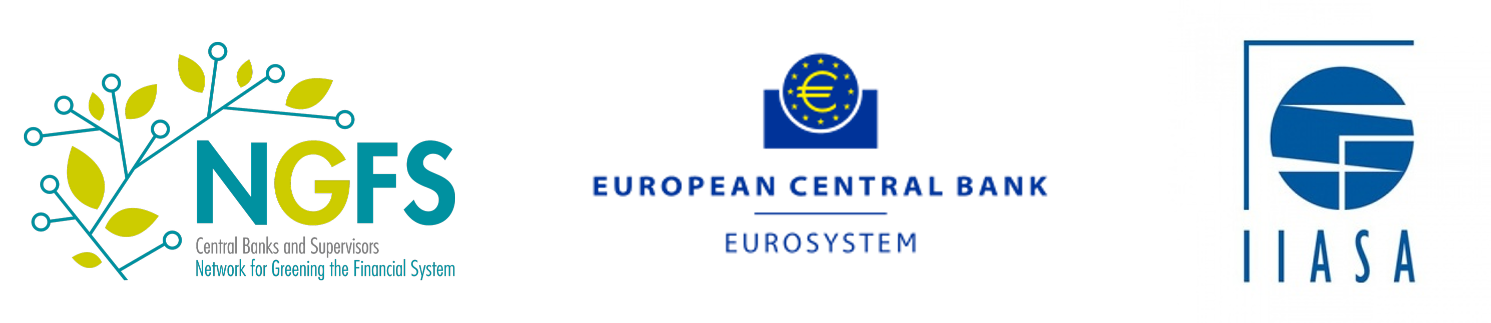